In [2]:
import sweetviz as sv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
dataset.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3567540,0,15474115,39.00,W,1804,161.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3567541,0,15474141,30.95,W,12577,268.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3567542,0,15474167,121.50,W,16560,476.0,150.0,visa,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3567543,0,15474217,171.00,W,7861,494.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3567544,0,15474240,107.95,W,8335,532.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.shape

(10000, 434)

In [5]:
print(f'There are {dataset.isnull().any().sum()} columns in train dataset with missing values.')

features_w_NaN = [feature for feature in dataset.columns if dataset[feature].isna().sum() > 1]
for feature in features_w_NaN:
    print(feature, np.round(dataset[feature].isnull().mean(), 4), "% of missing values")
    
# Result: Set all NaN values to "missing", 
#  Set all features with NaN > 80% to 1 - missing and 0 - not missing

There are 336 columns in train dataset with missing values.
card2 0.0112 % of missing values
card5 0.0018 % of missing values
addr1 0.0845 % of missing values
addr2 0.0845 % of missing values
dist1 0.5194 % of missing values
dist2 0.9568 % of missing values
P_emaildomain 0.1614 % of missing values
R_emaildomain 0.8283 % of missing values
D1 0.0041 % of missing values
D2 0.4044 % of missing values
D3 0.3662 % of missing values
D4 0.2251 % of missing values
D5 0.4328 % of missing values
D6 0.9024 % of missing values
D7 0.9424 % of missing values
D8 0.8998 % of missing values
D9 0.8998 % of missing values
D10 0.0836 % of missing values
D11 0.2498 % of missing values
D12 0.9155 % of missing values
D13 0.916 % of missing values
D14 0.9144 % of missing values
D15 0.0818 % of missing values
M1 0.2499 % of missing values
M2 0.2499 % of missing values
M3 0.2499 % of missing values
M4 0.4681 % of missing values
M5 0.5569 % of missing values
M6 0.2142 % of missing values
M7 0.342 % of missing val

In [6]:
# NUMERICAL FEATURES (continuous and discrete) 
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
print("There are {} numerical features: {}".format(len(numerical_features), numerical_features))
numerical_features_test = [feature for feature in test.columns if test[feature].dtype != 'O']

print()
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']
print("There are {} categorical features: {}".format(len(categorical_features), categorical_features))
categorical_features_test = [feature for feature in test.columns if test[feature].dtype == 'O']

There are 403 numerical features: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V9

In [7]:
## Fins continuous and discrete
# If unique valuess of labels > 30, then do discrete

discrete_features = [feature for feature in numerical_features if (len(dataset[feature].unique()) < 20) ]
continuous_features = [feature for feature in numerical_features if (feature not in discrete_features) & (feature != 'TransactionID')]

In [8]:
print("There are {} discrete features: {}".format(len(discrete_features), discrete_features))
print()
print("There are {} cont features: {}".format(len(continuous_features), continuous_features))

There are 260 discrete features: ['isFraud', 'addr2', 'C3', 'C12', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V98', 'V100', 'V101', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V146', 'V147', 'V148'

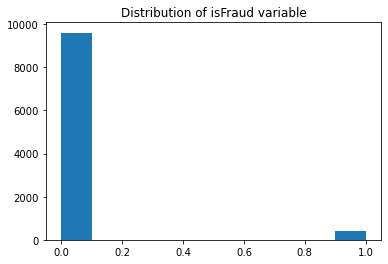

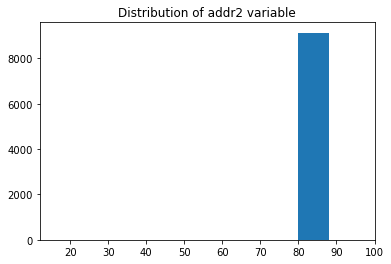

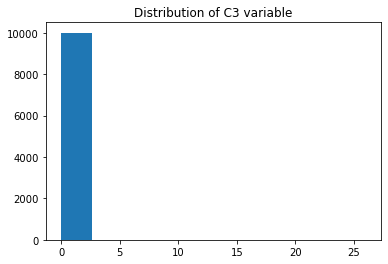

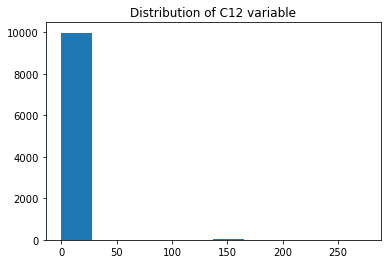

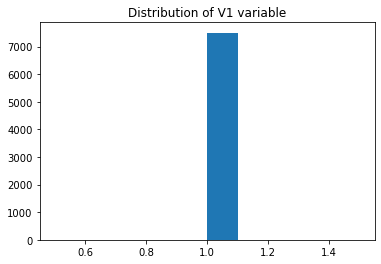

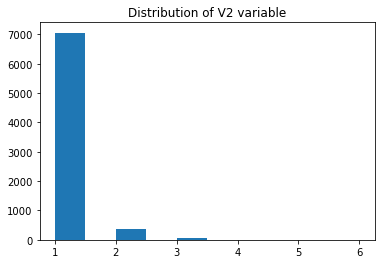

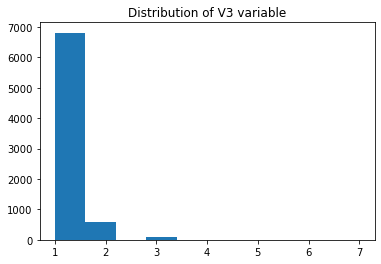

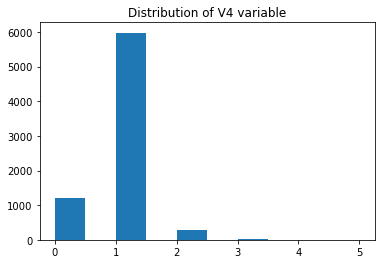

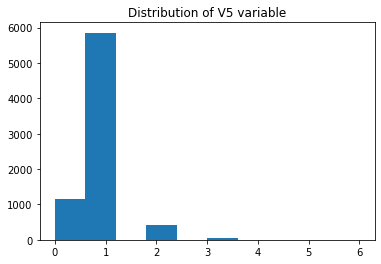

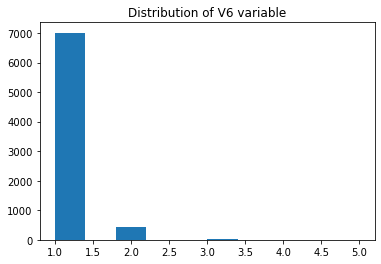

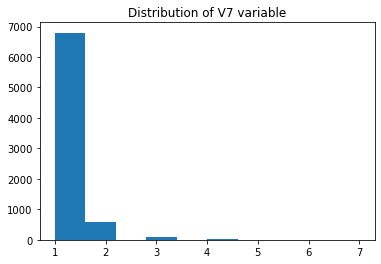

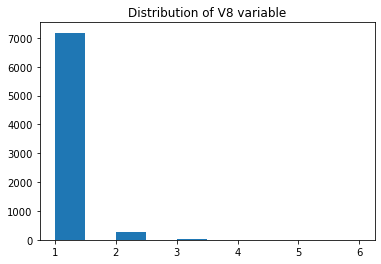

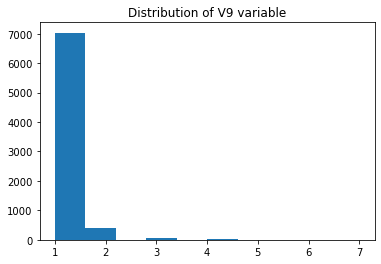

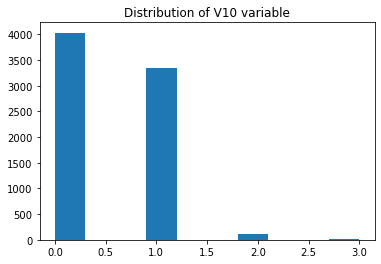

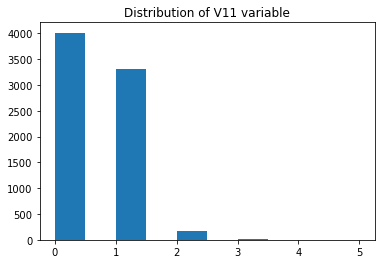

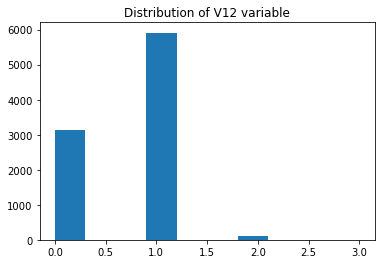

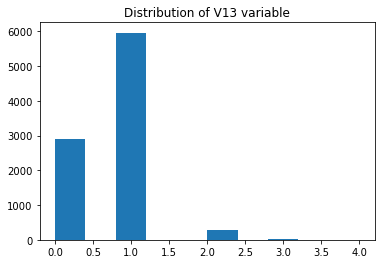

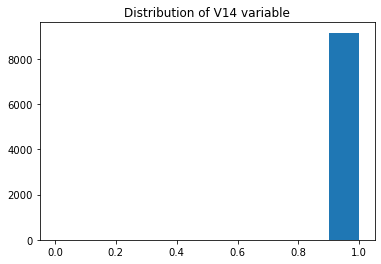

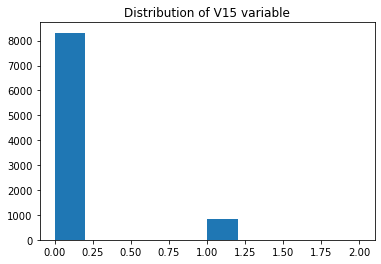

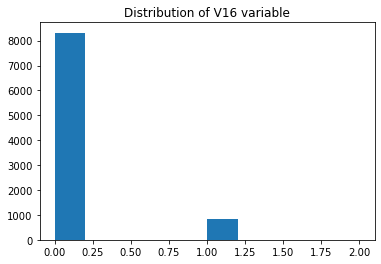

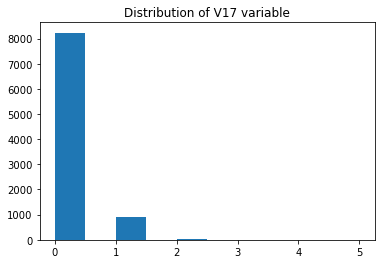

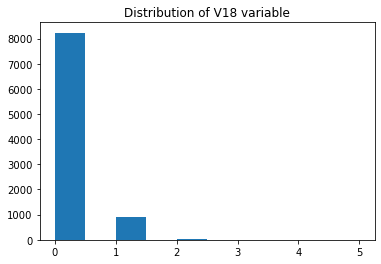

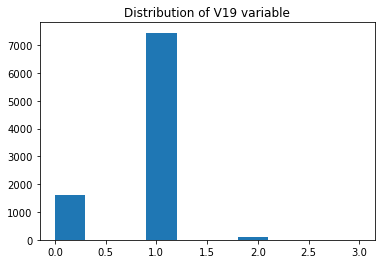

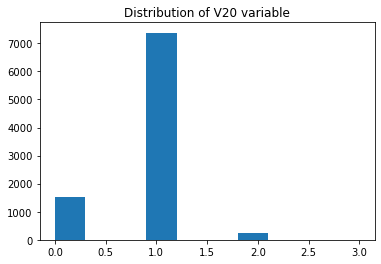

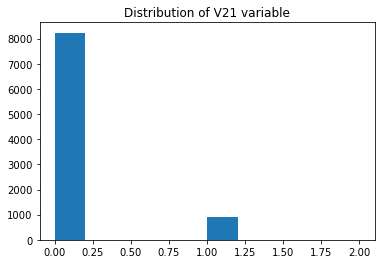

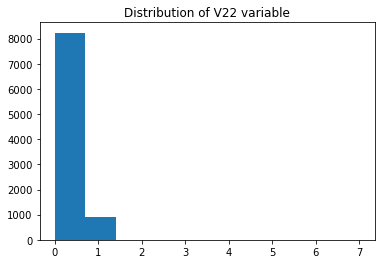

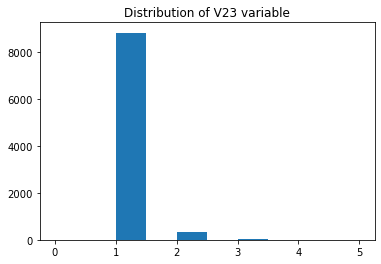

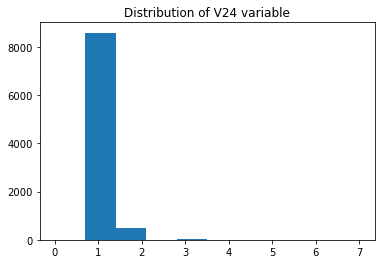

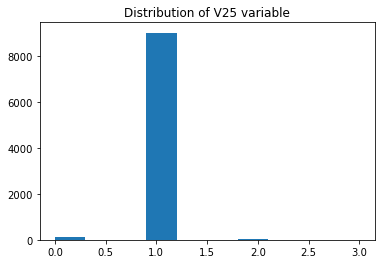

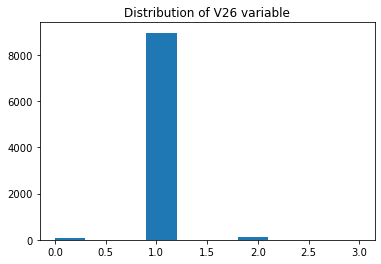

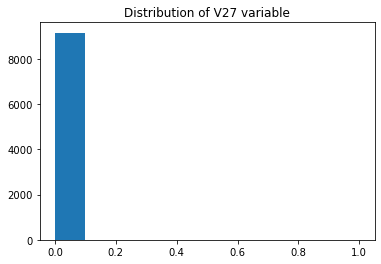

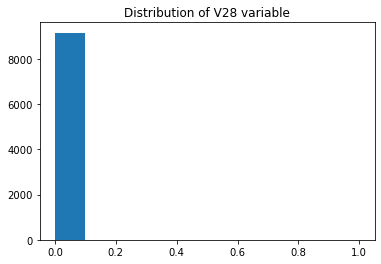

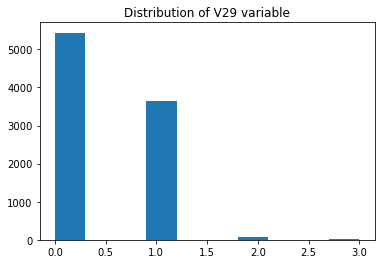

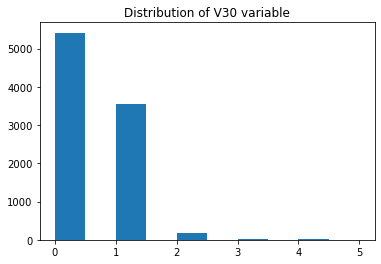

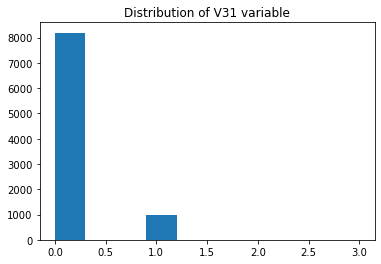

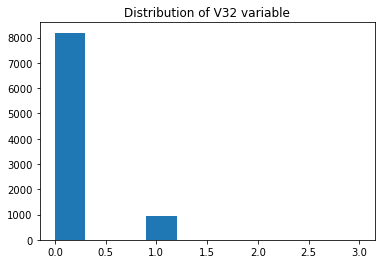

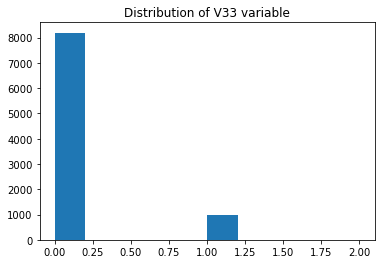

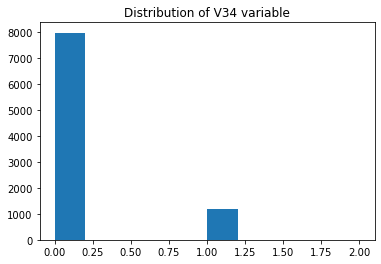

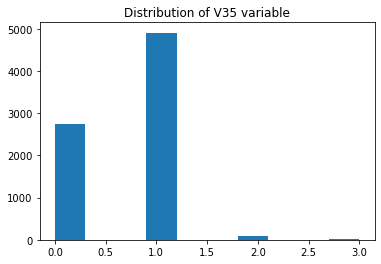

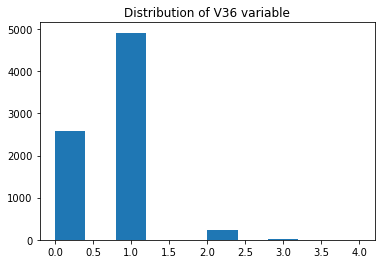

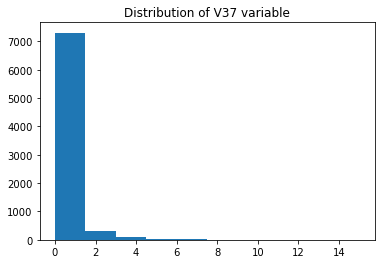

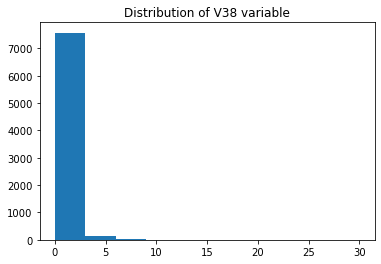

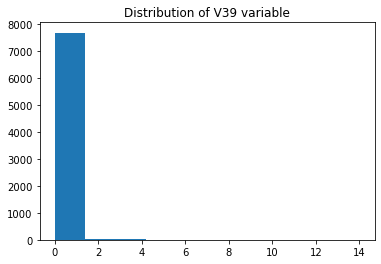

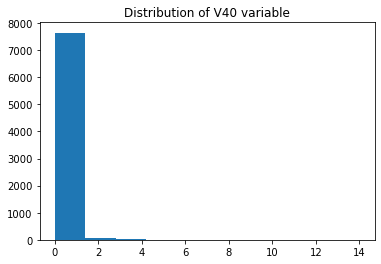

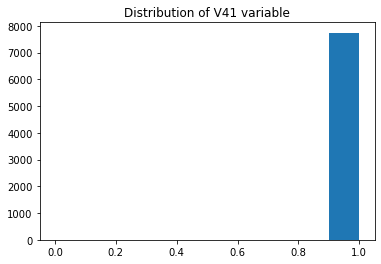

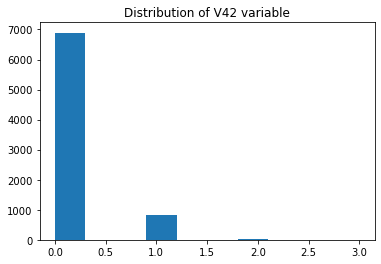

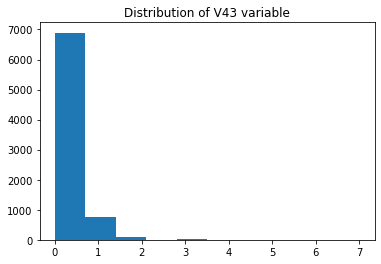

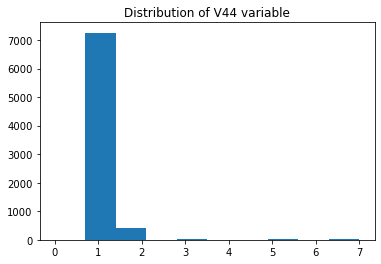

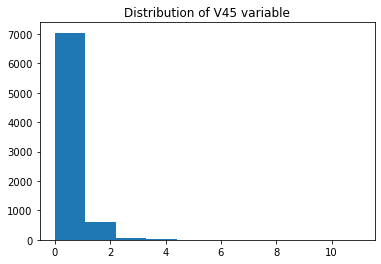

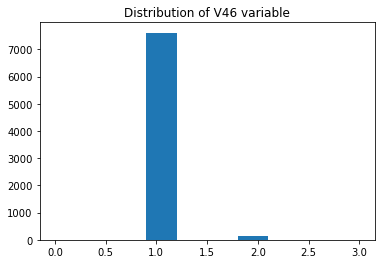

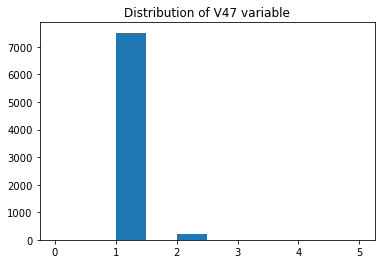

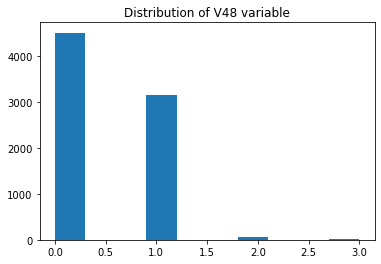

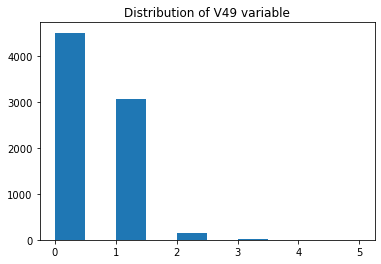

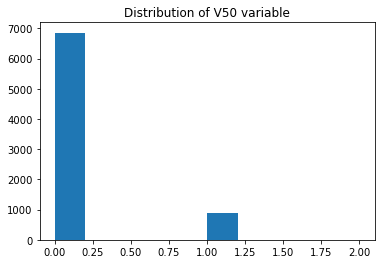

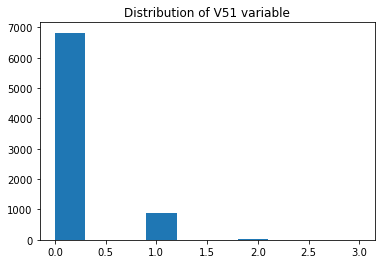

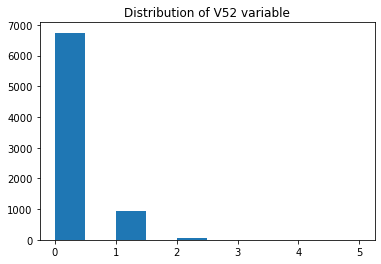

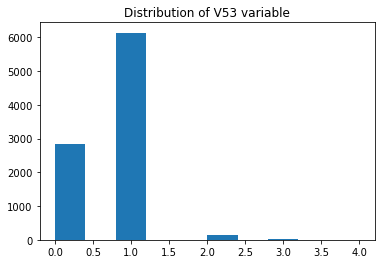

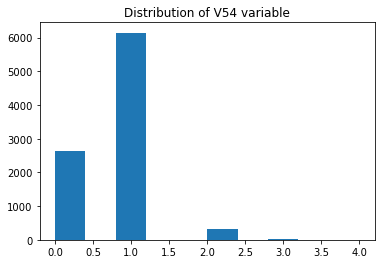

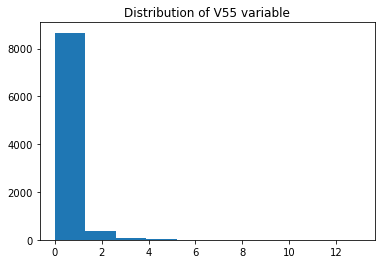

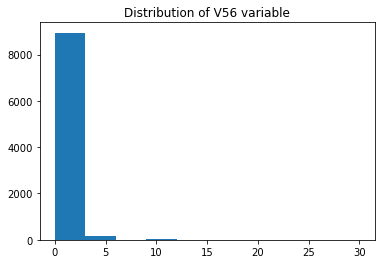

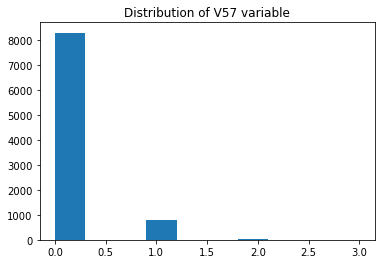

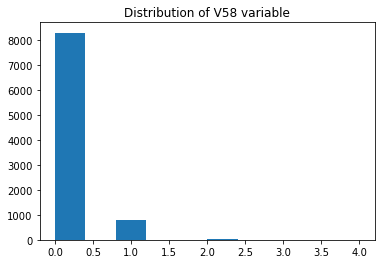

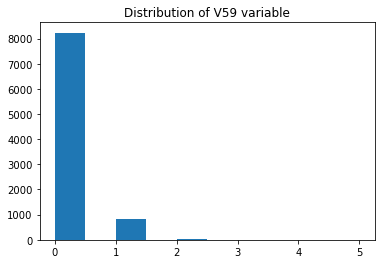

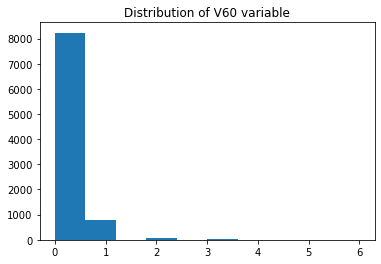

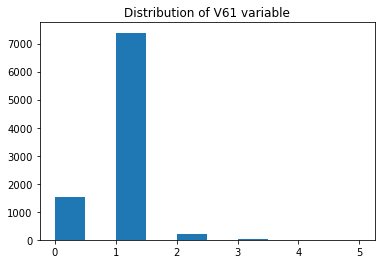

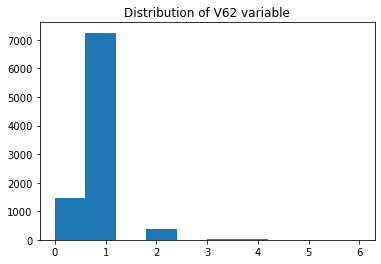

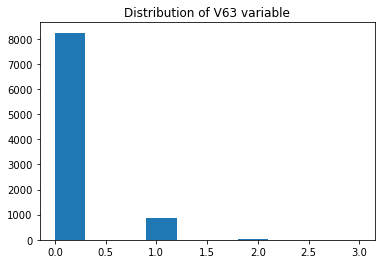

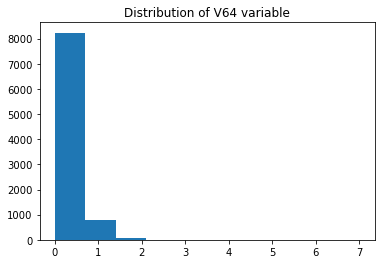

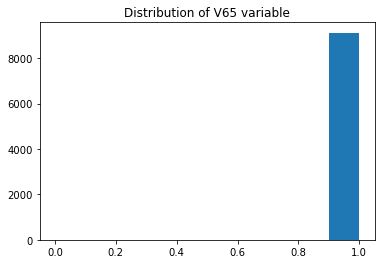

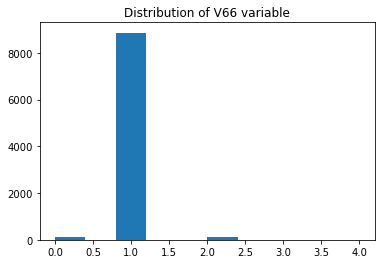

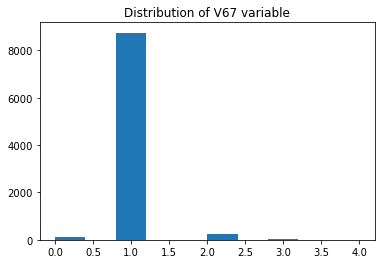

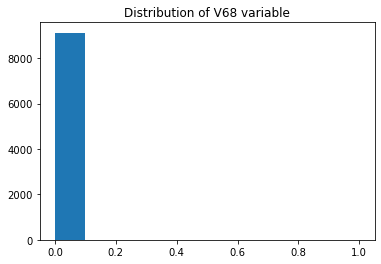

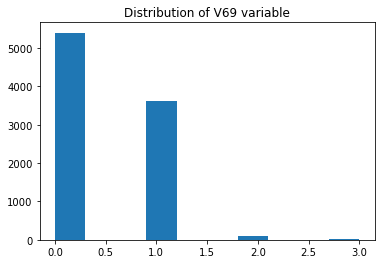

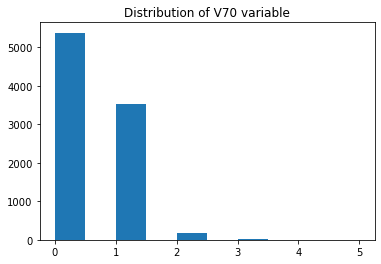

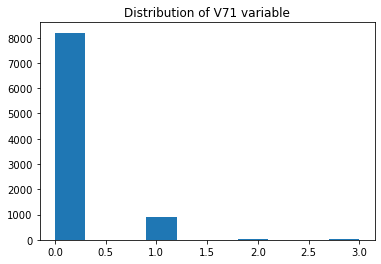

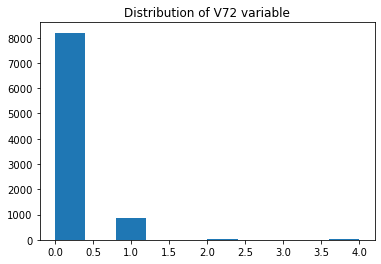

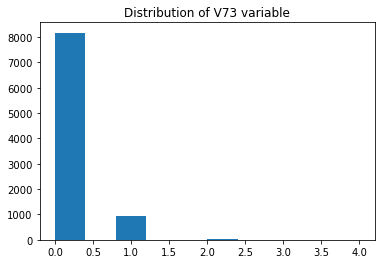

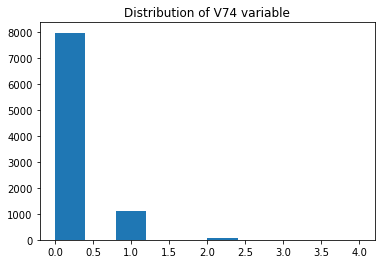

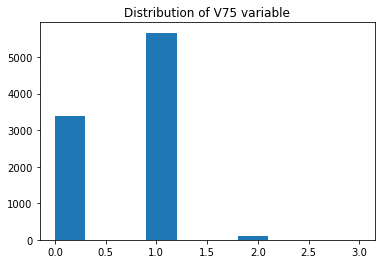

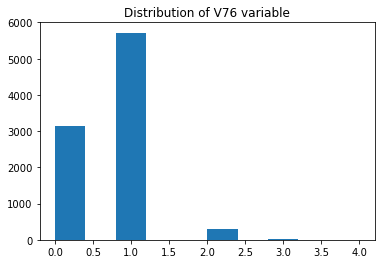

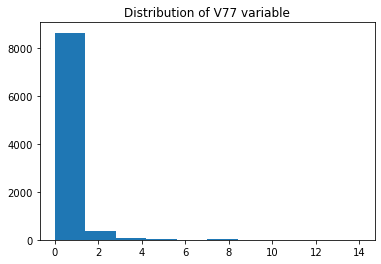

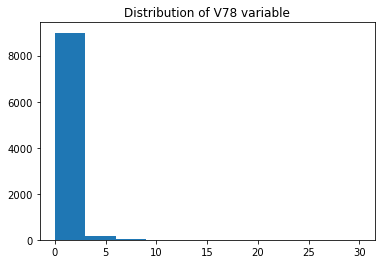

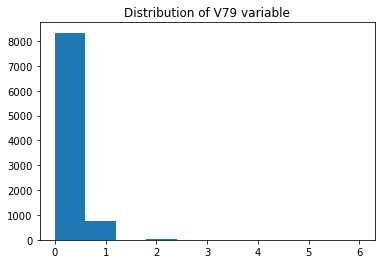

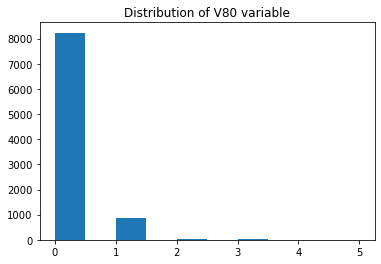

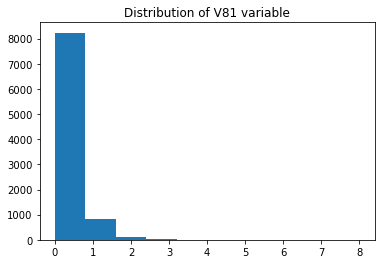

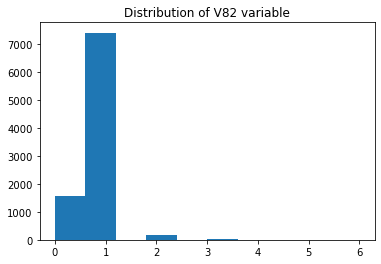

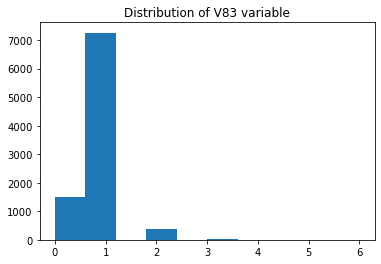

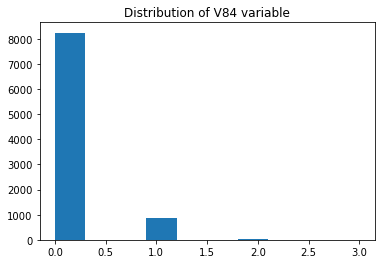

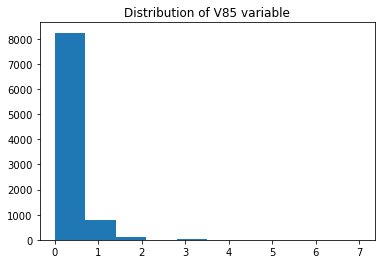

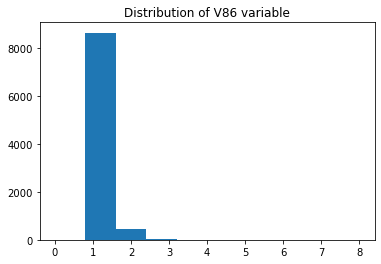

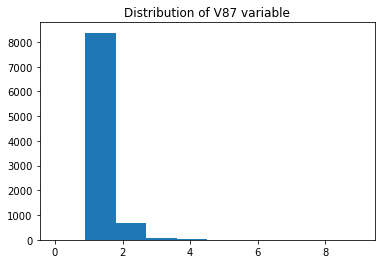

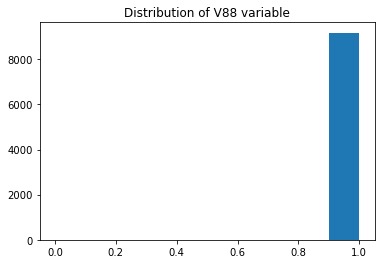

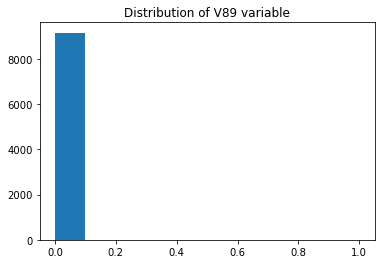

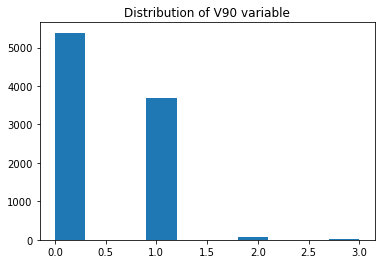

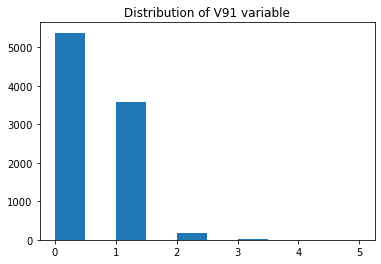

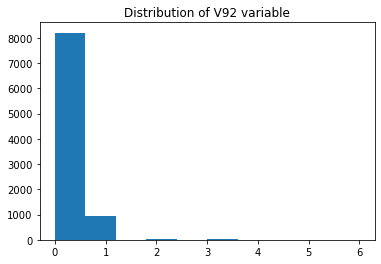

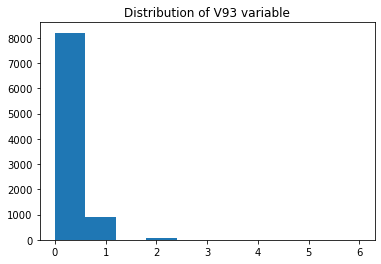

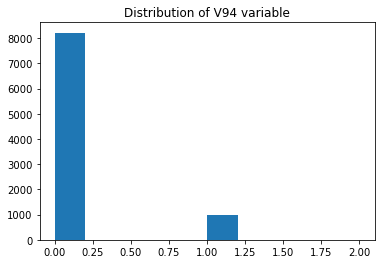

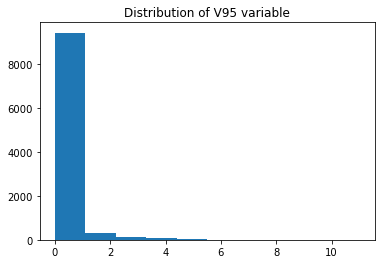

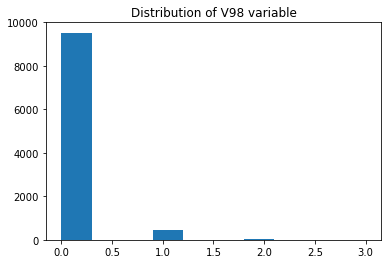

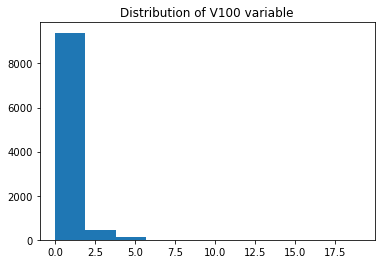

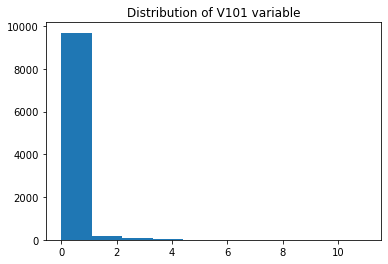

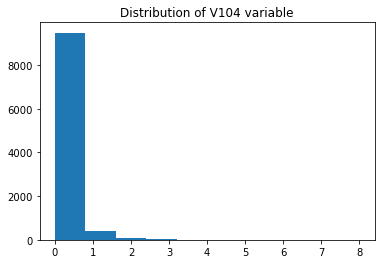

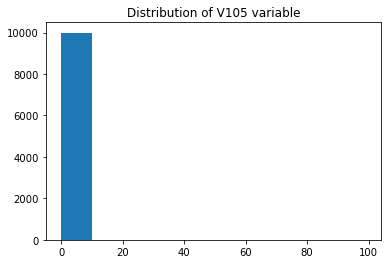

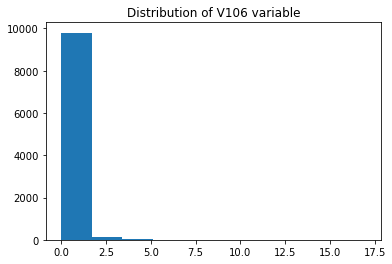

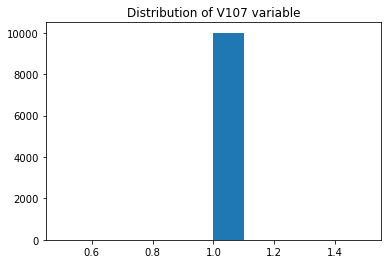

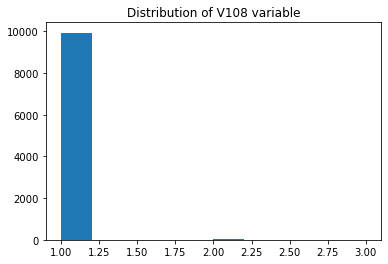

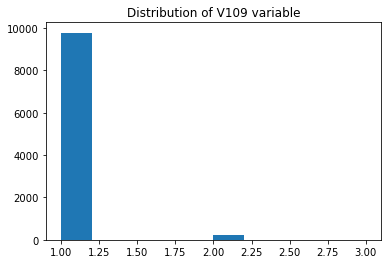

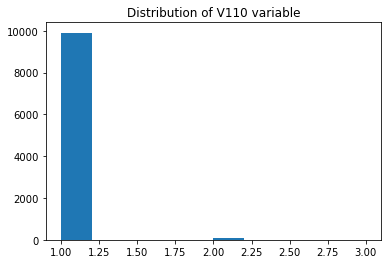

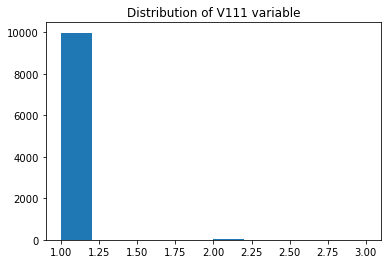

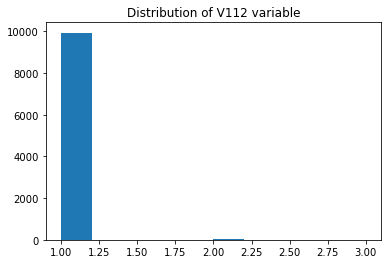

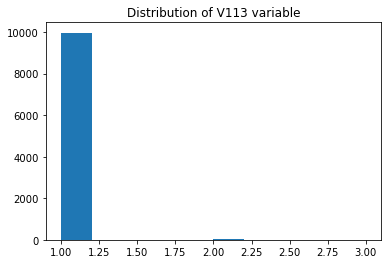

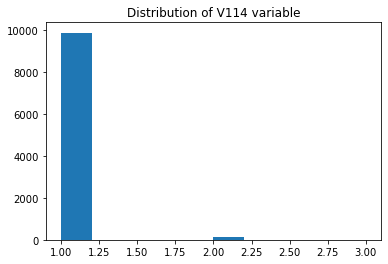

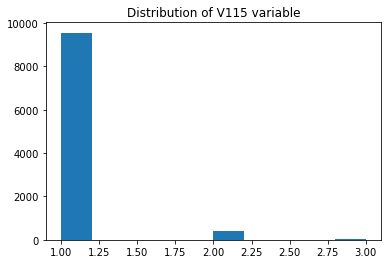

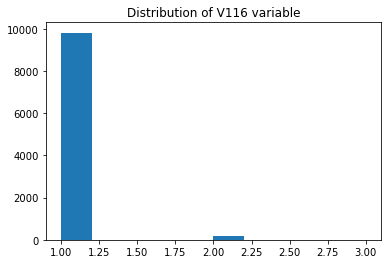

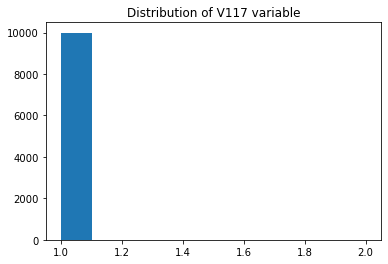

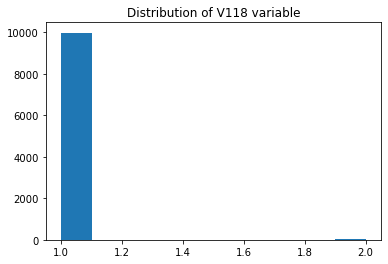

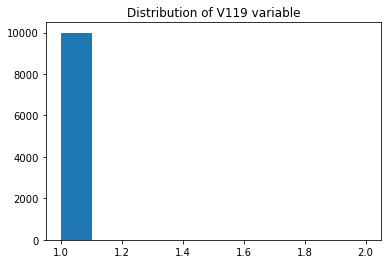

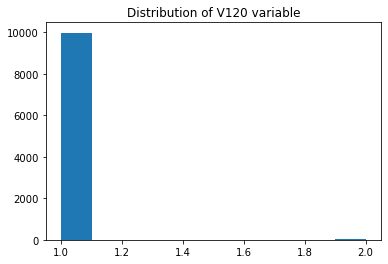

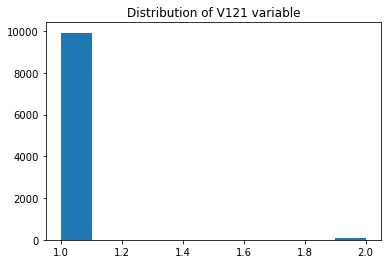

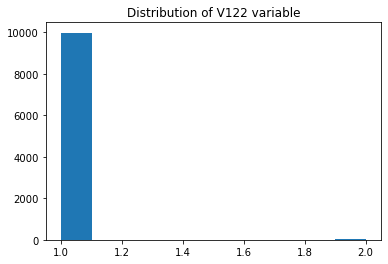

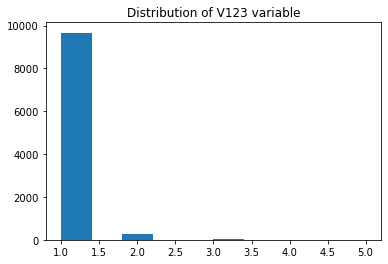

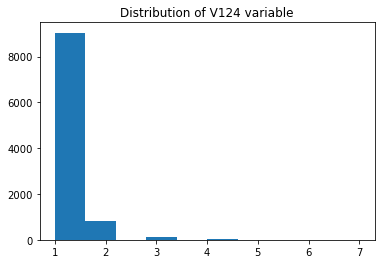

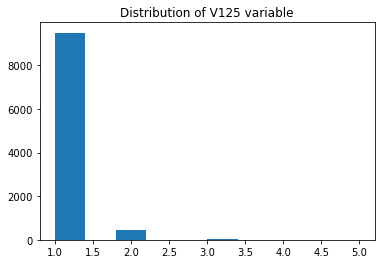

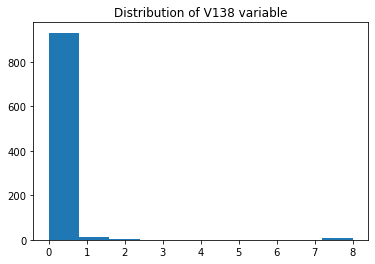

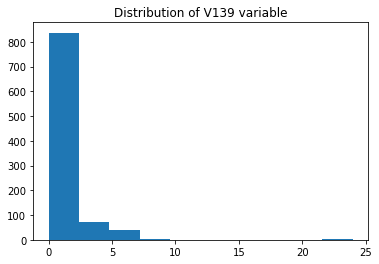

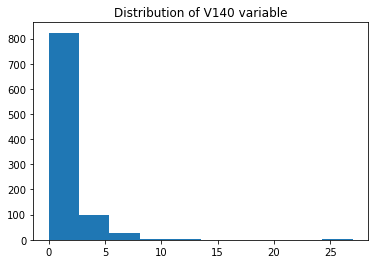

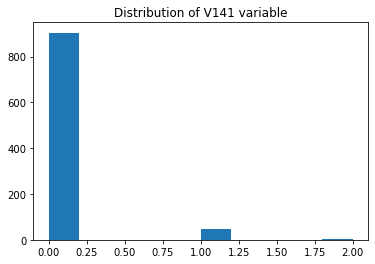

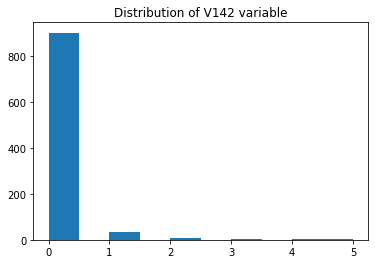

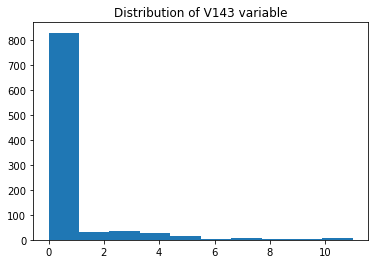

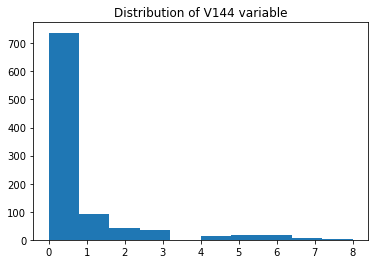

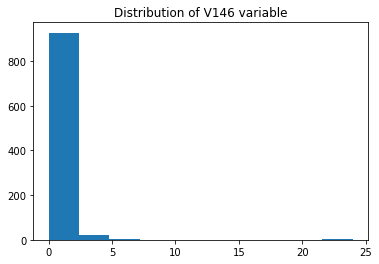

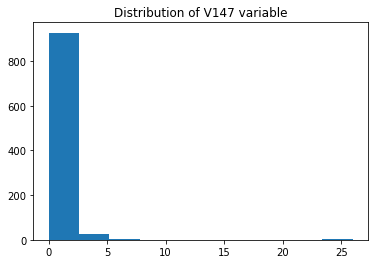

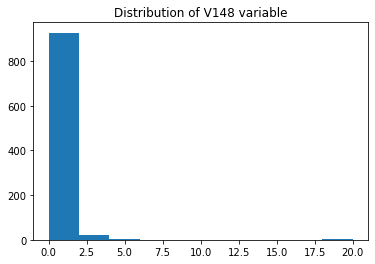

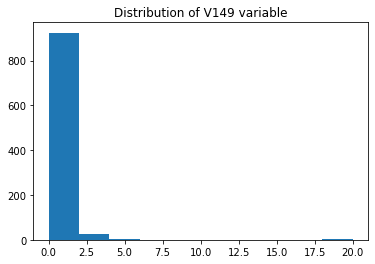

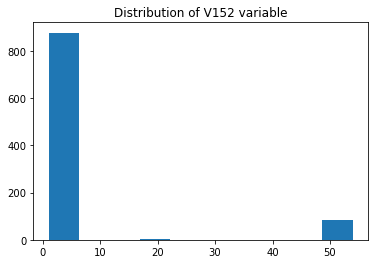

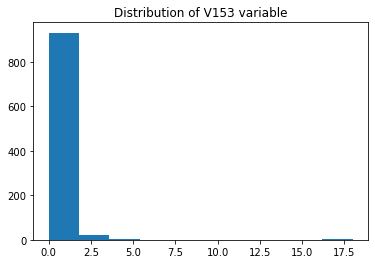

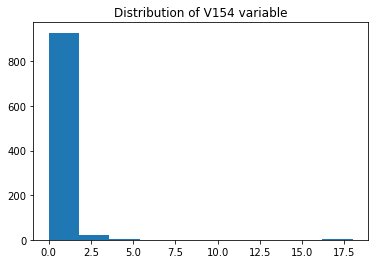

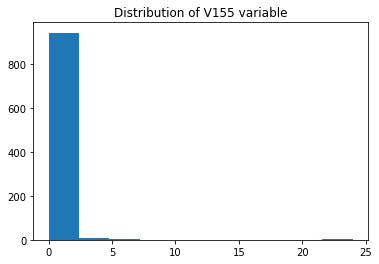

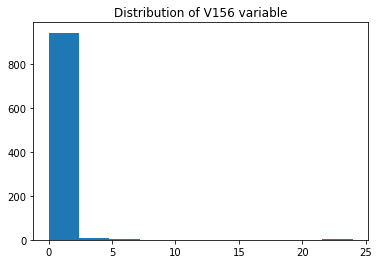

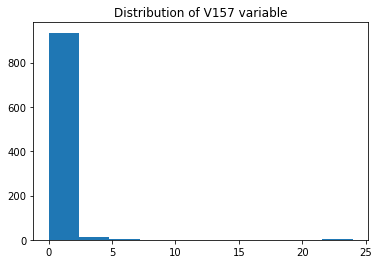

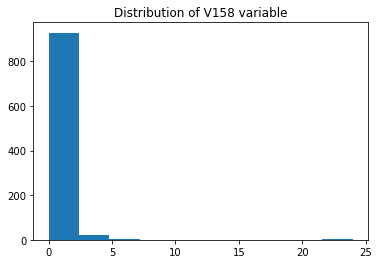

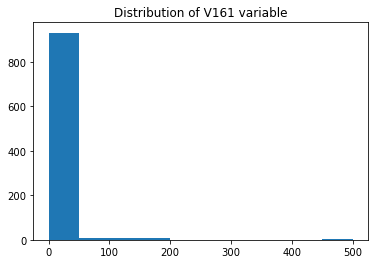

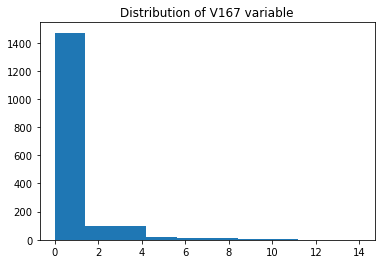

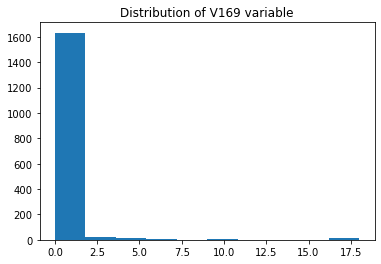

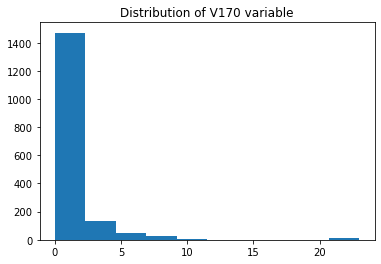

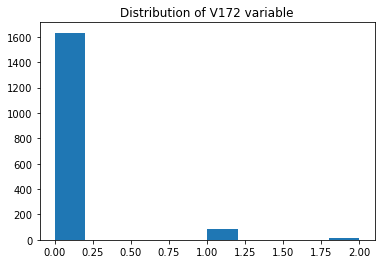

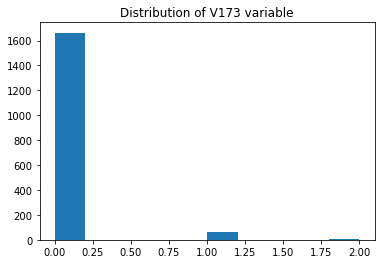

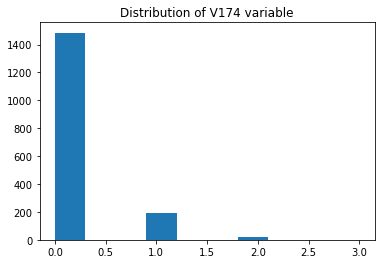

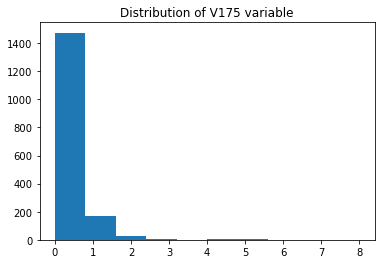

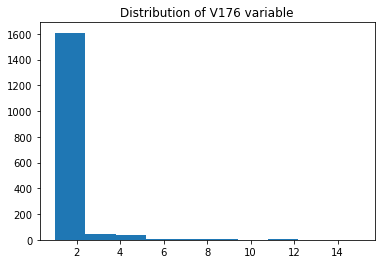

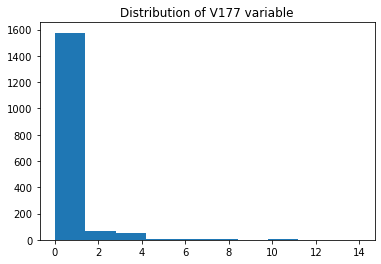

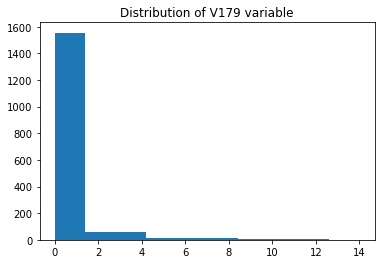

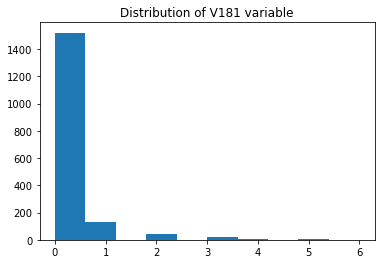

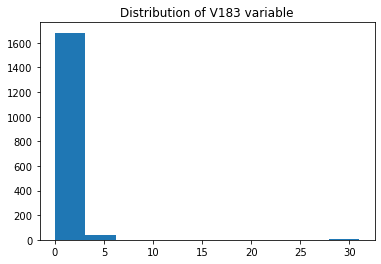

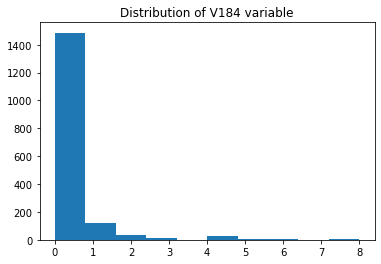

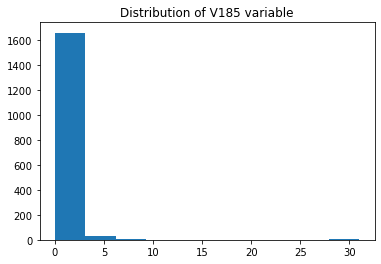

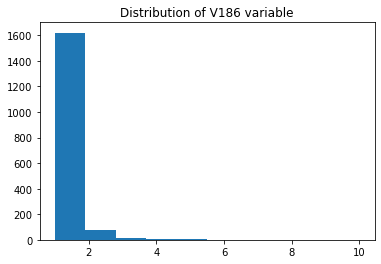

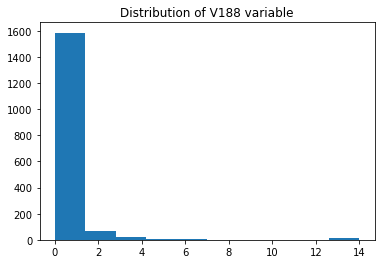

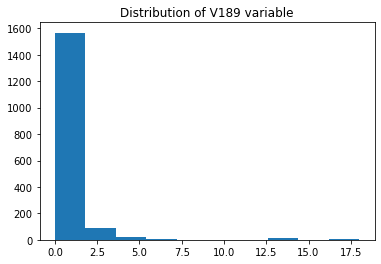

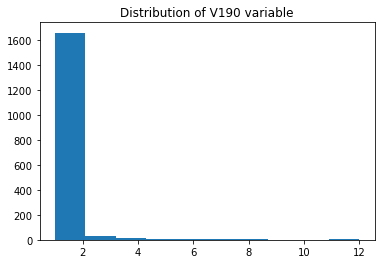

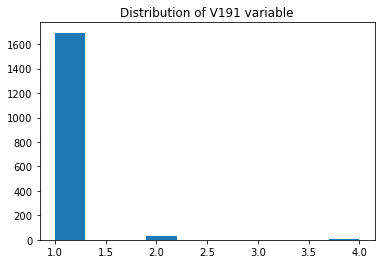

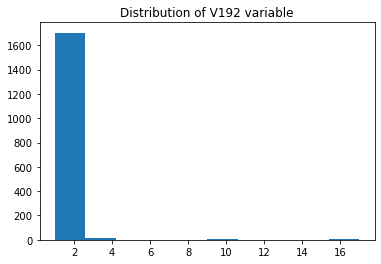

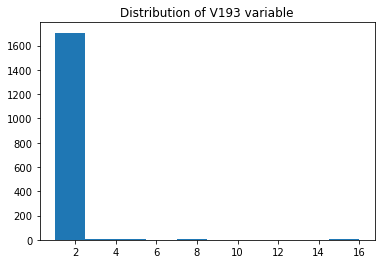

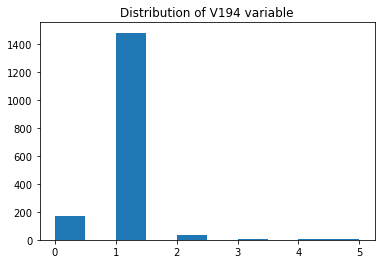

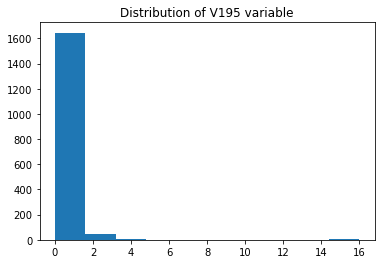

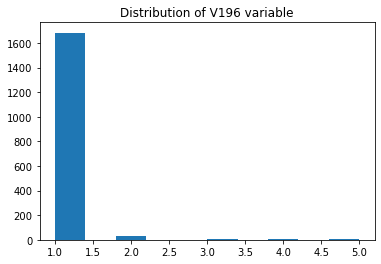

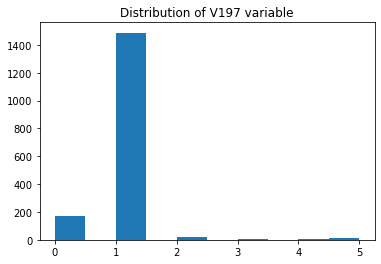

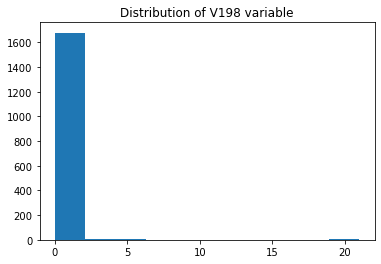

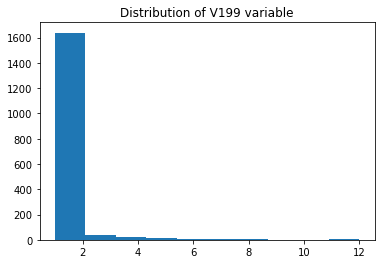

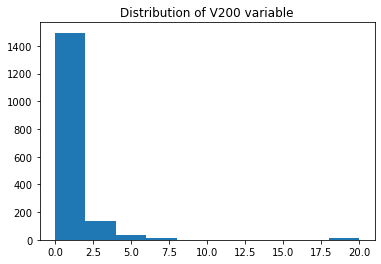

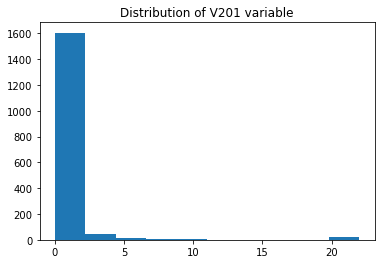

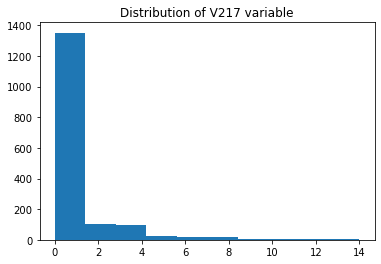

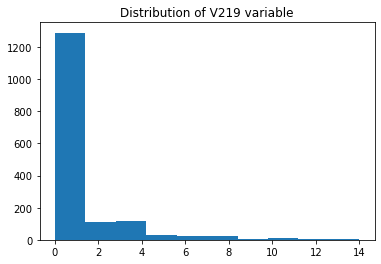

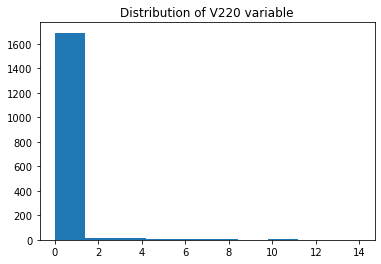

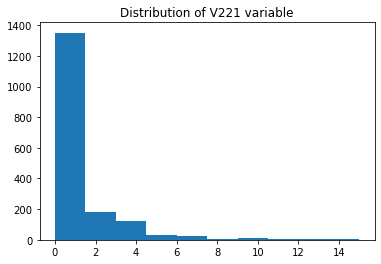

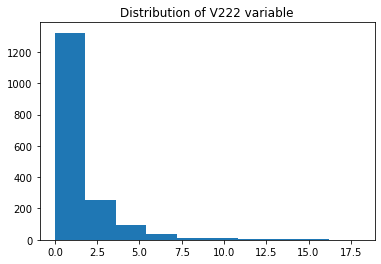

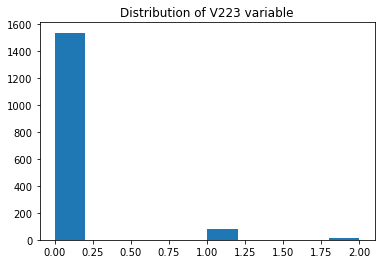

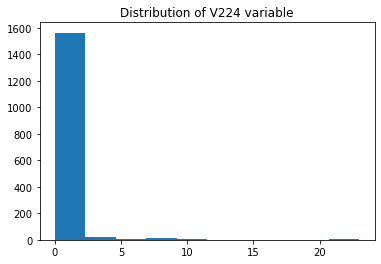

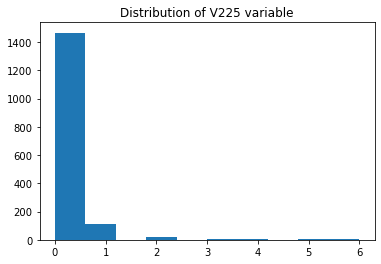

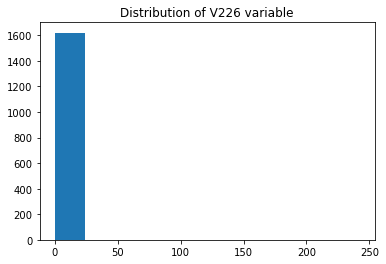

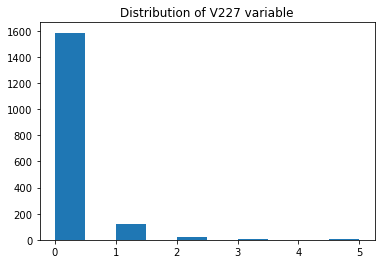

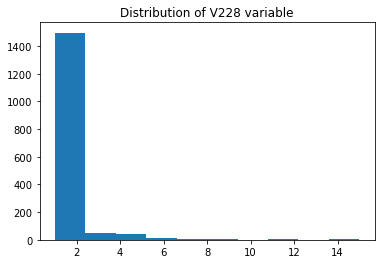

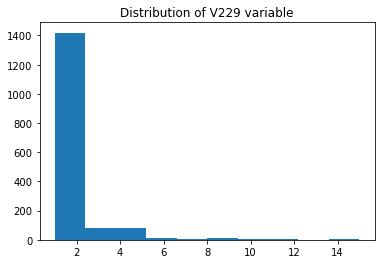

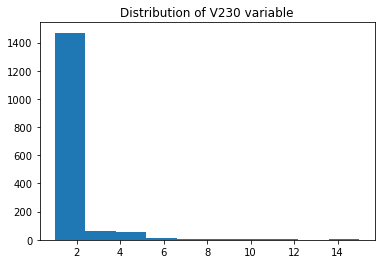

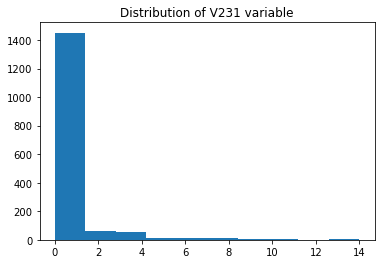

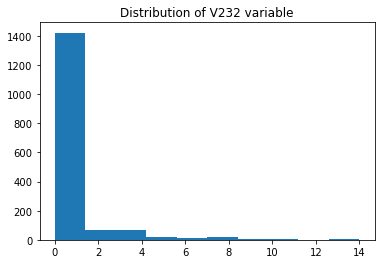

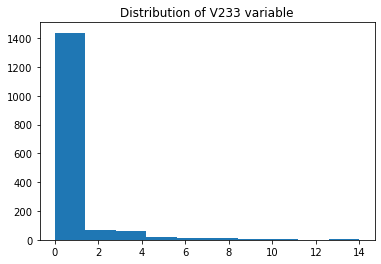

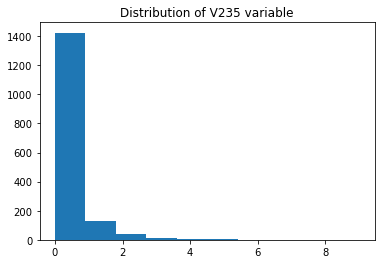

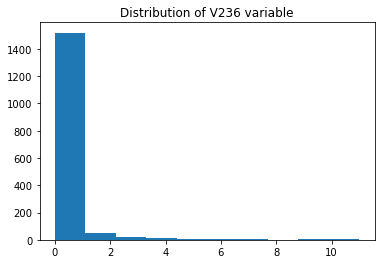

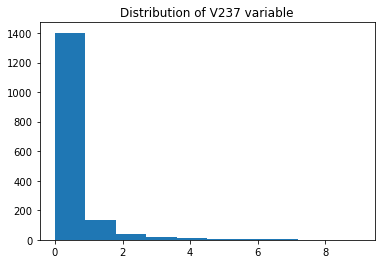

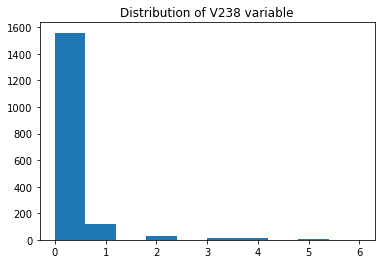

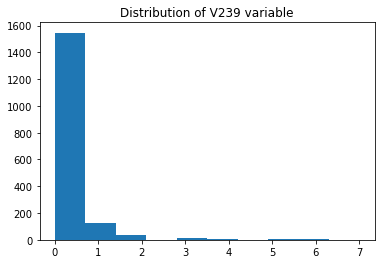

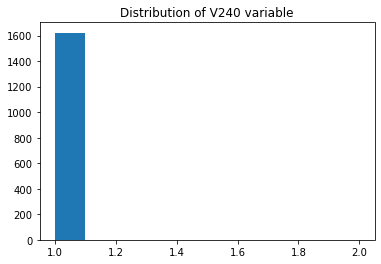

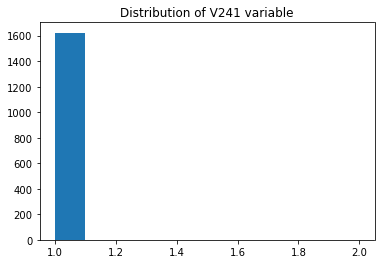

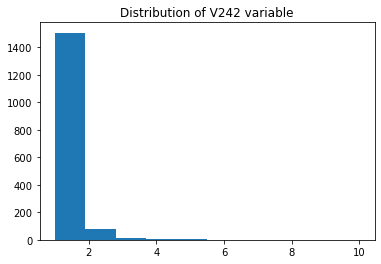

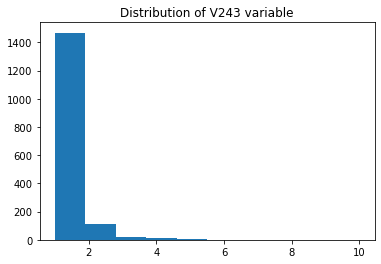

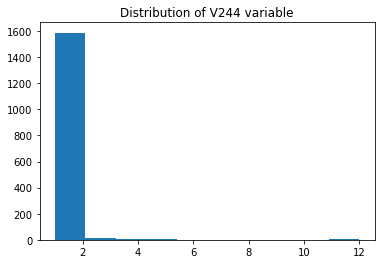

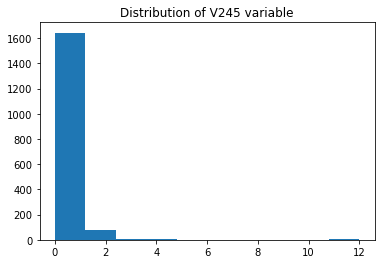

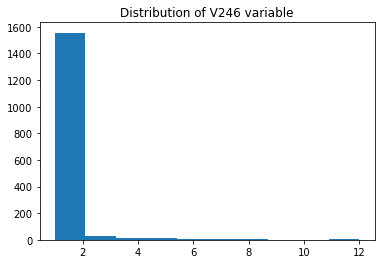

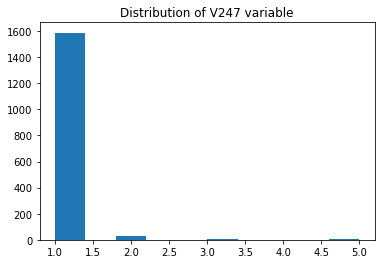

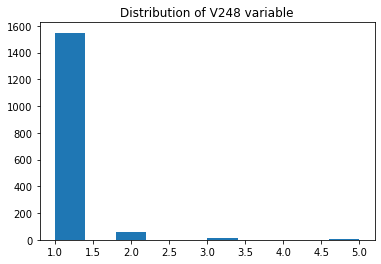

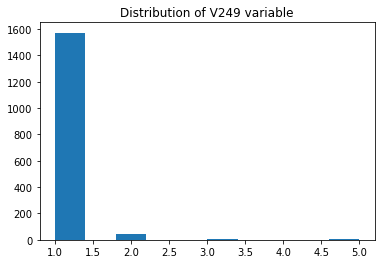

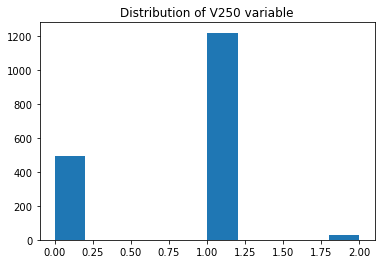

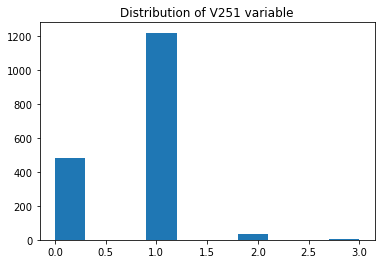

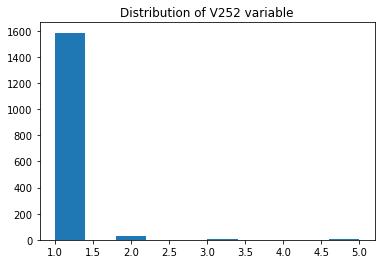

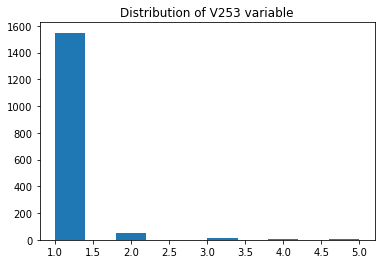

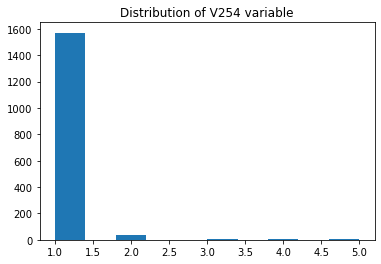

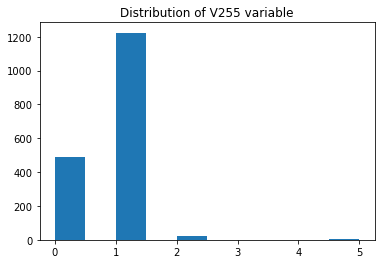

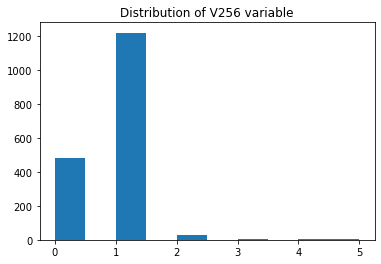

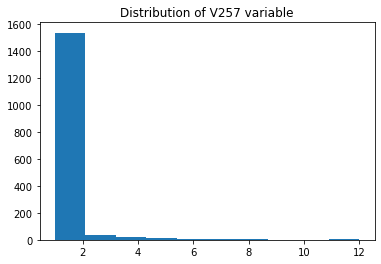

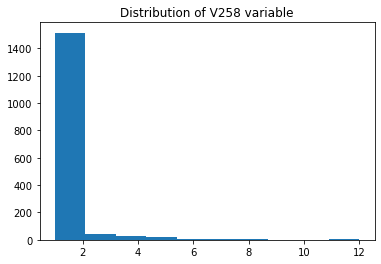

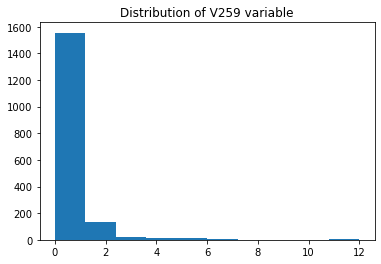

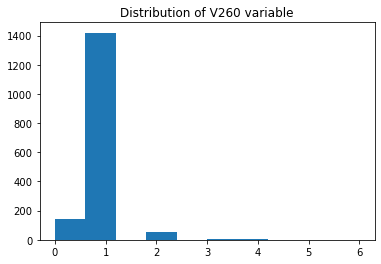

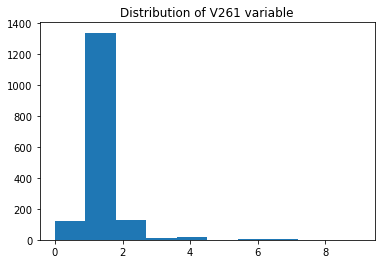

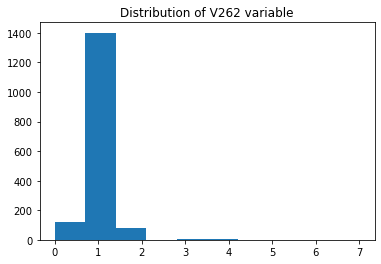

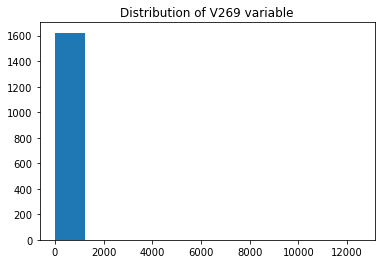

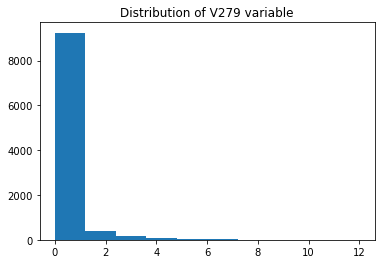

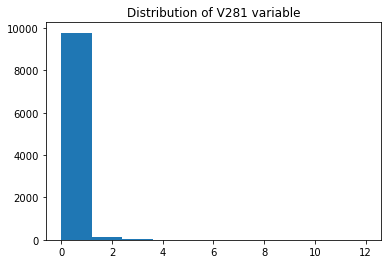

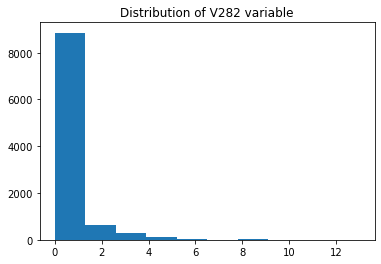

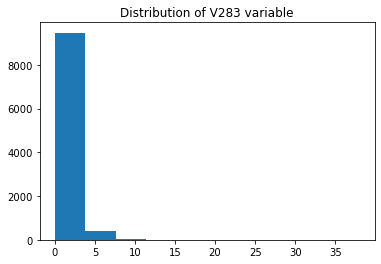

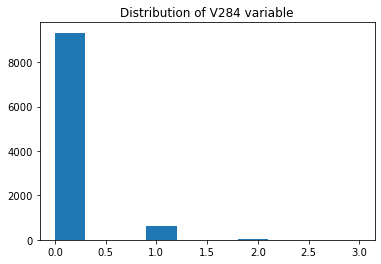

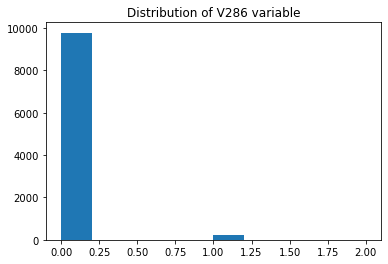

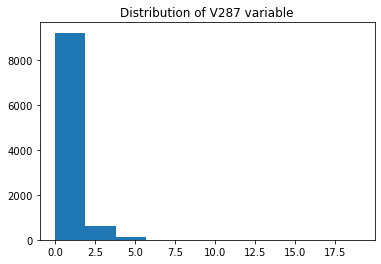

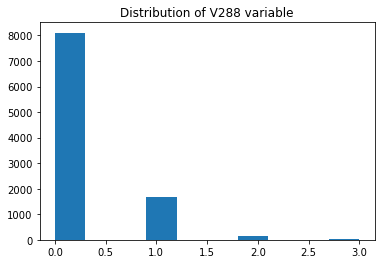

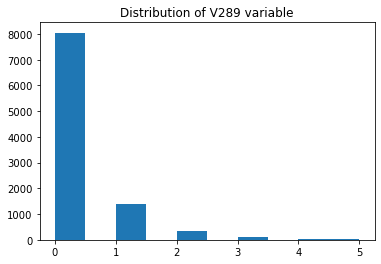

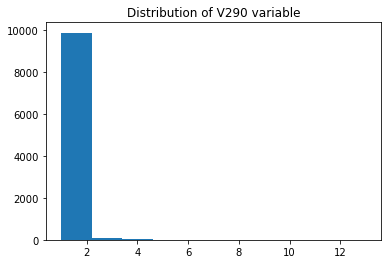

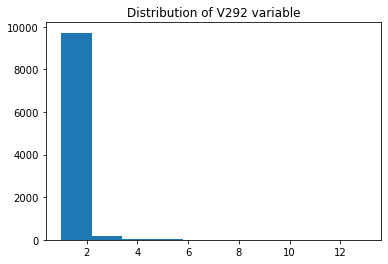

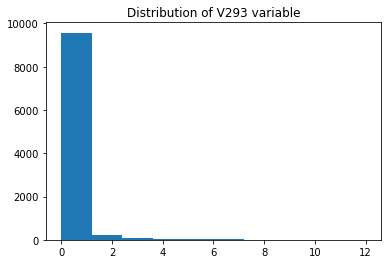

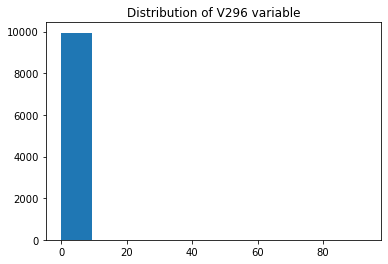

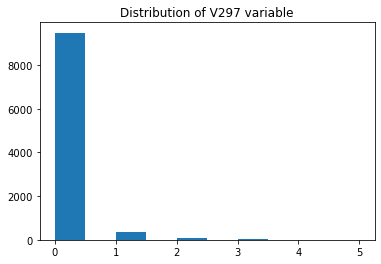

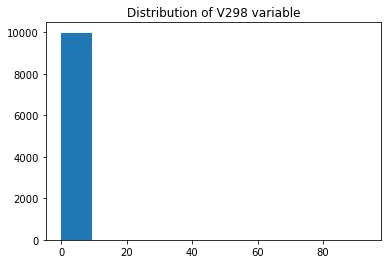

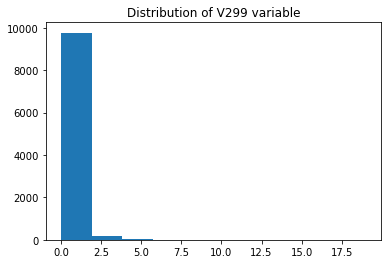

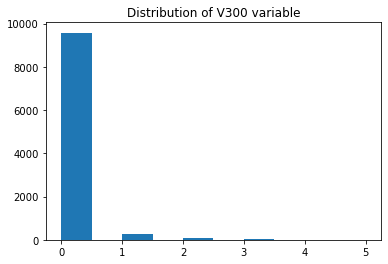

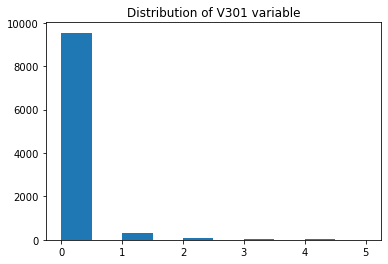

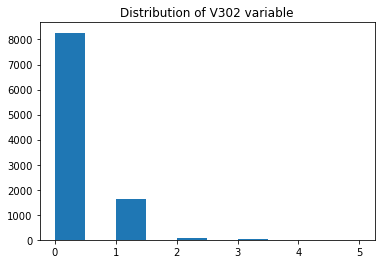

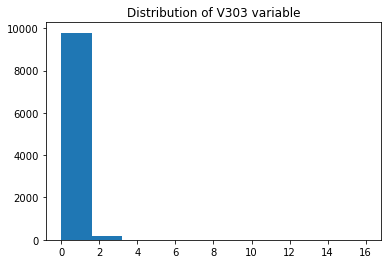

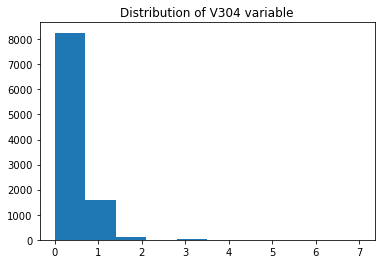

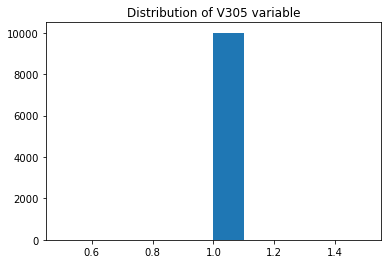

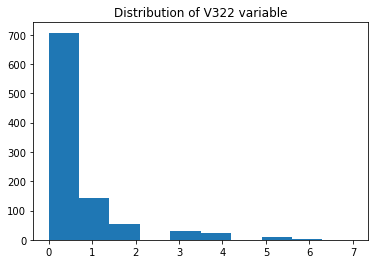

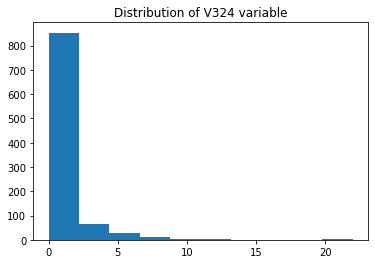

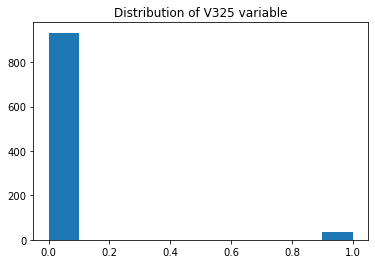

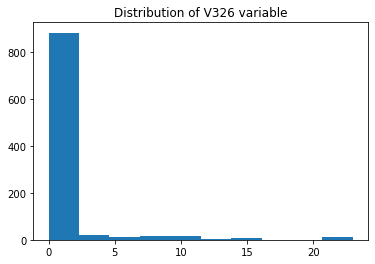

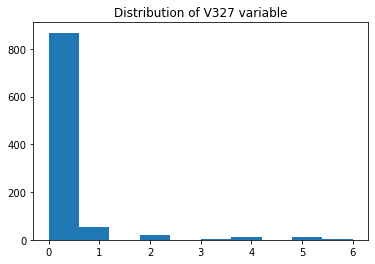

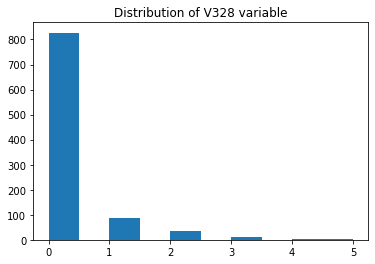

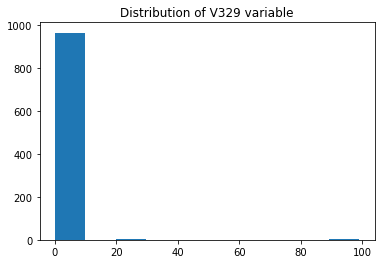

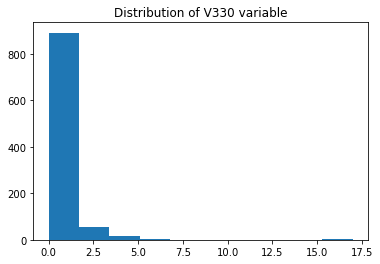

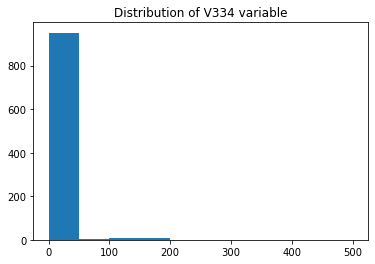

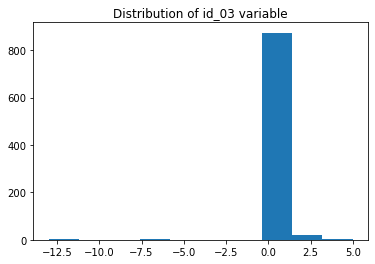

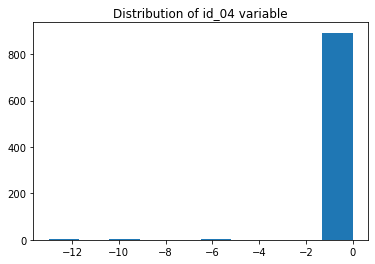

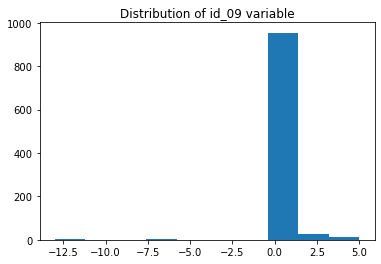

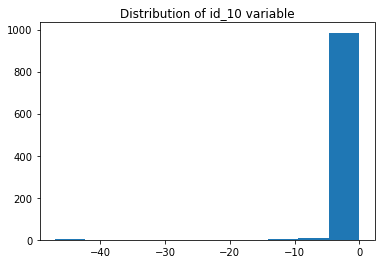

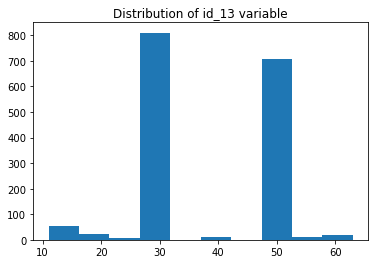

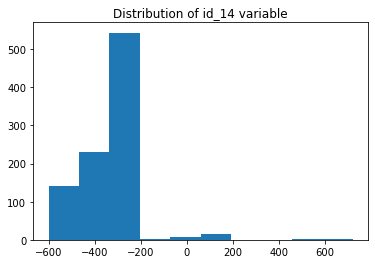

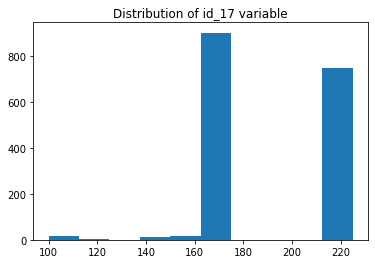

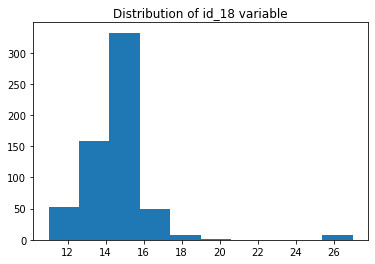

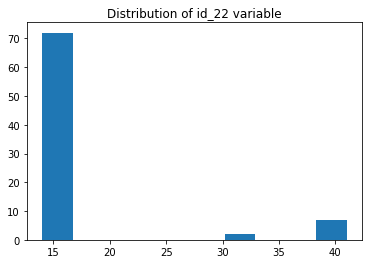

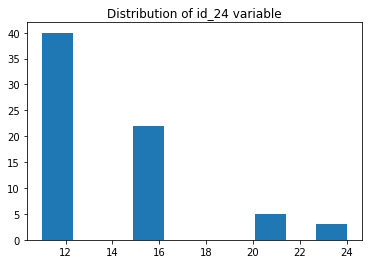

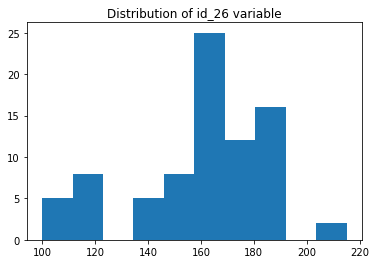

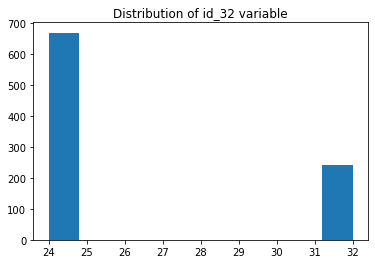

In [9]:
for feature in discrete_features:
    plt.hist(dataset[feature]);
    plt.title(f'Distribution of {feature} variable');
    plt.show()

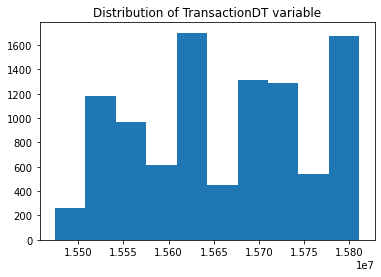

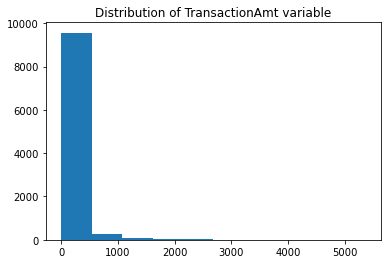

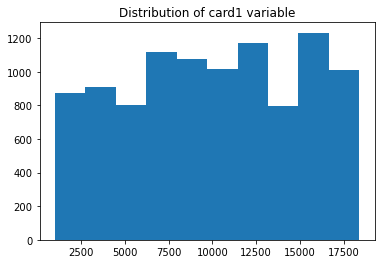

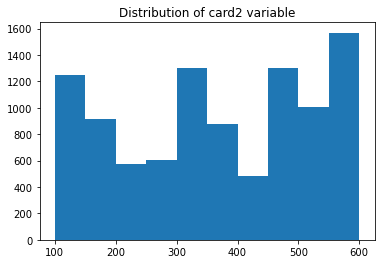

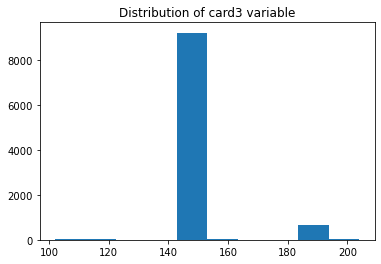

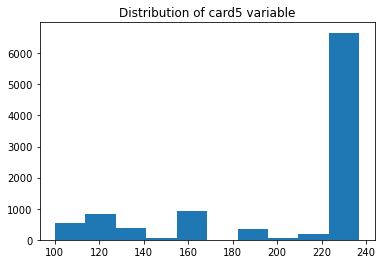

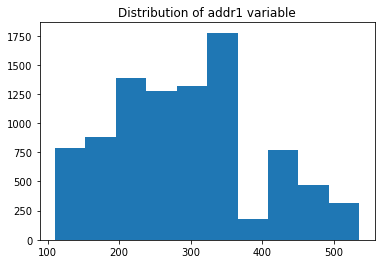

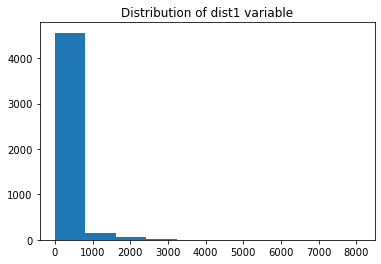

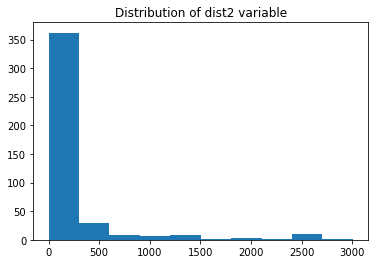

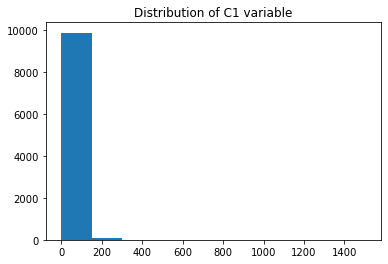

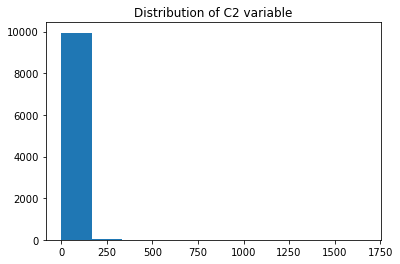

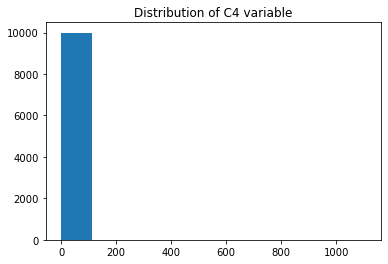

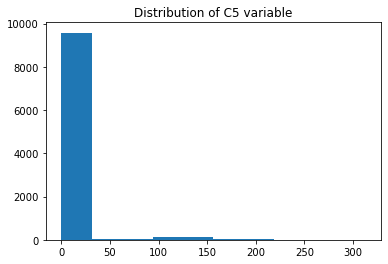

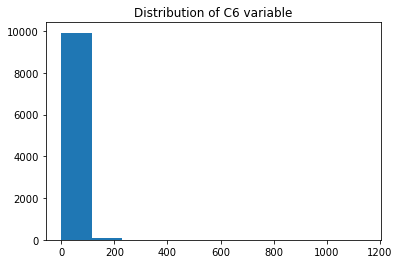

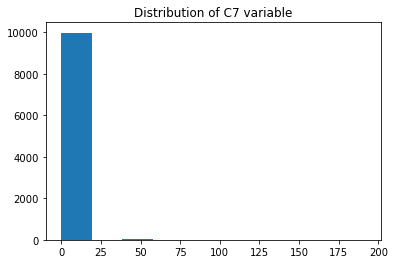

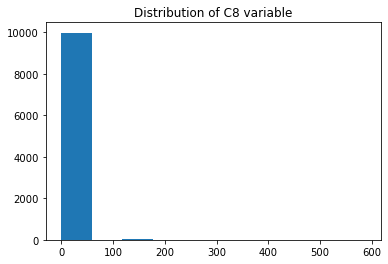

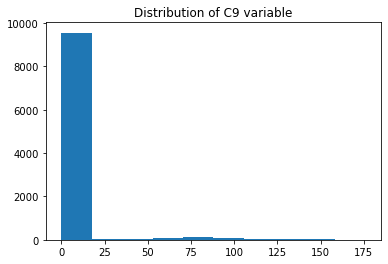

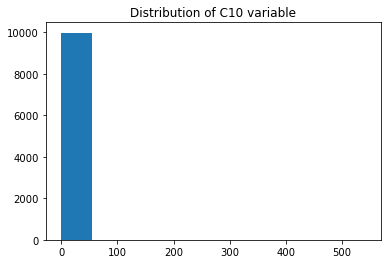

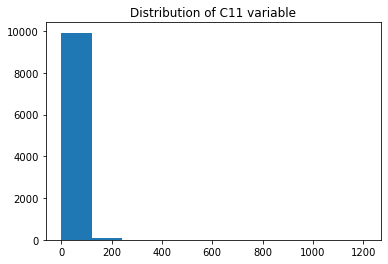

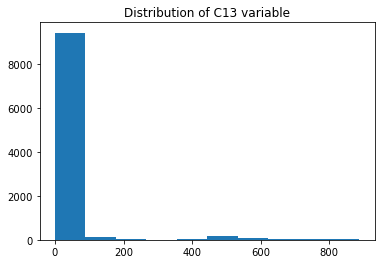

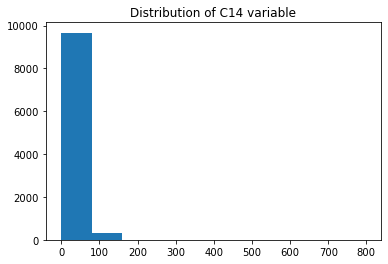

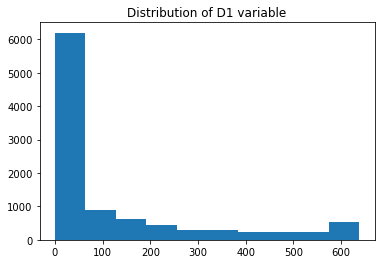

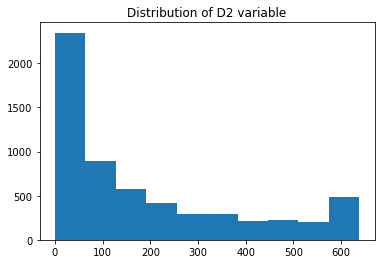

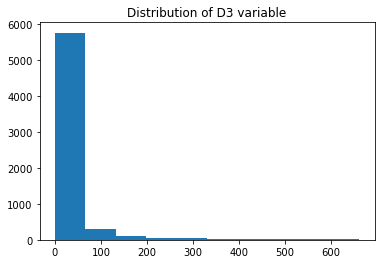

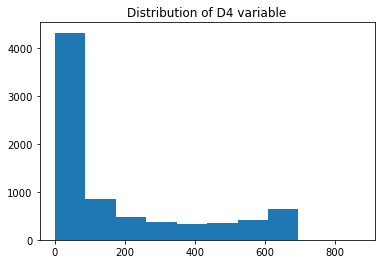

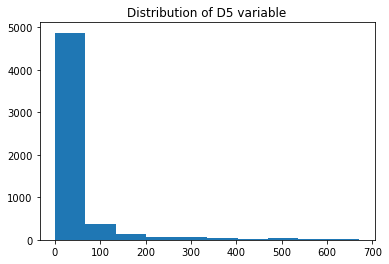

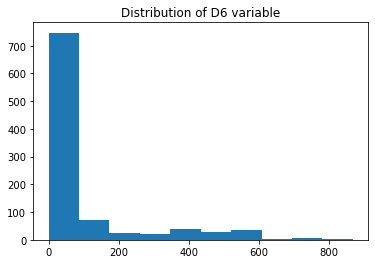

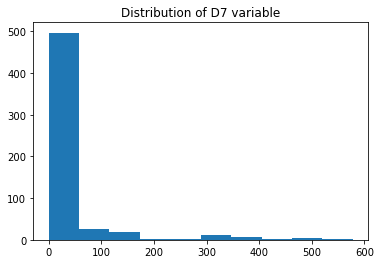

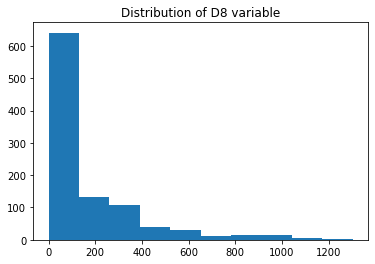

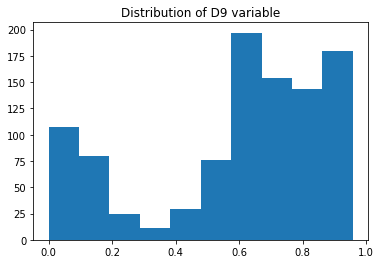

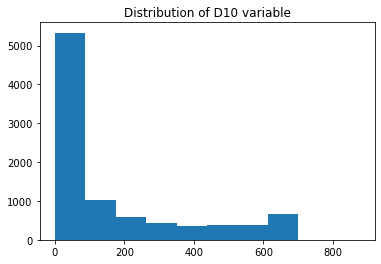

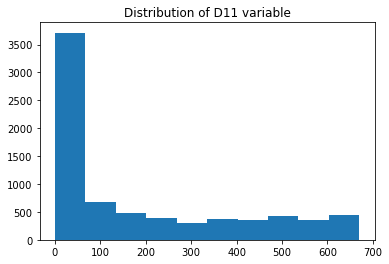

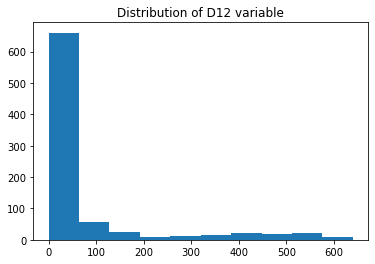

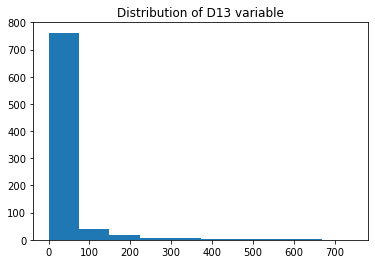

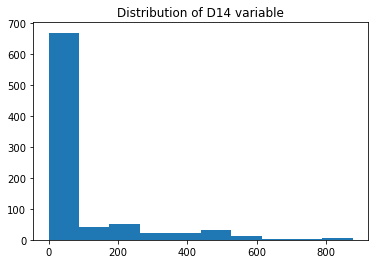

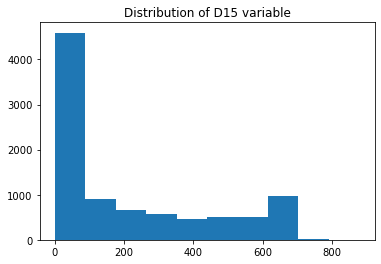

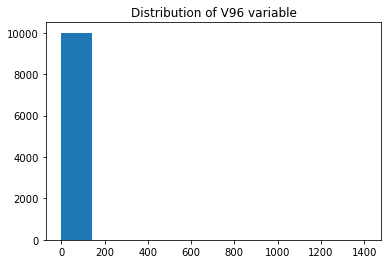

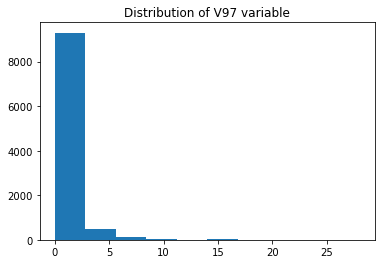

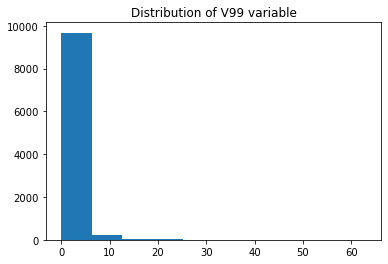

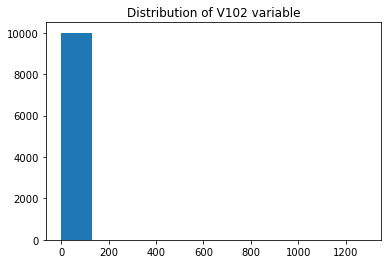

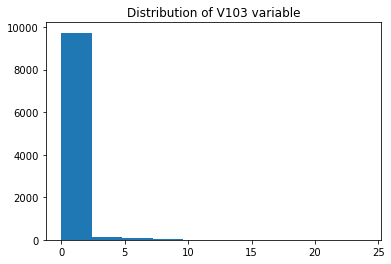

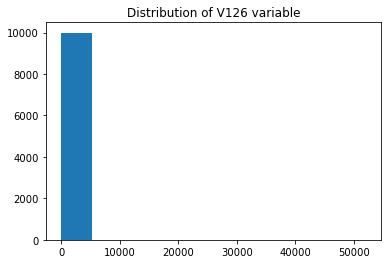

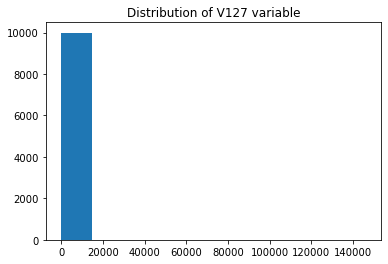

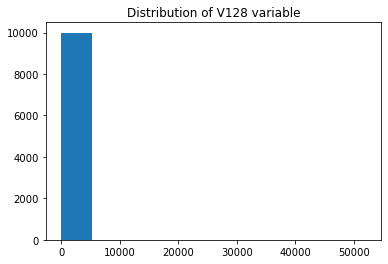

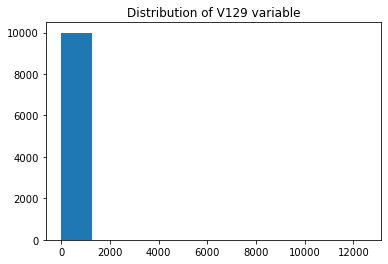

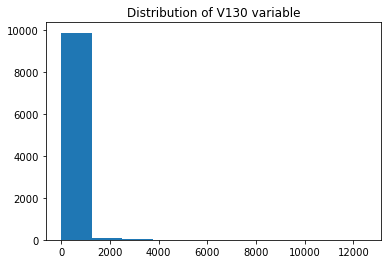

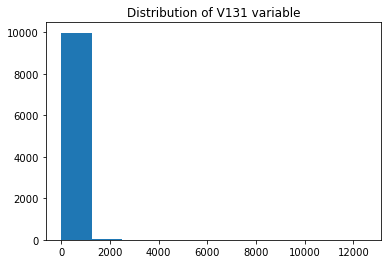

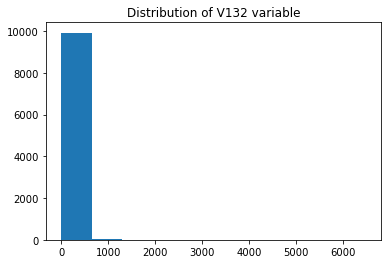

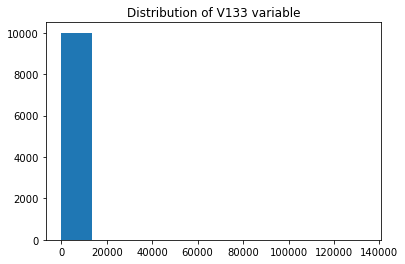

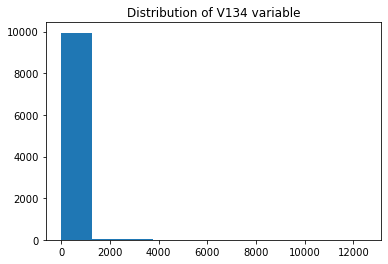

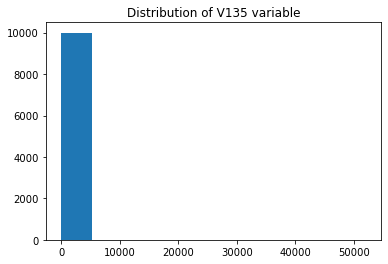

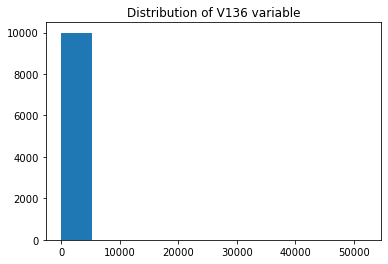

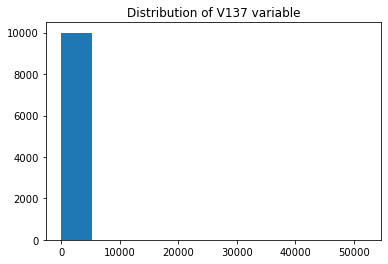

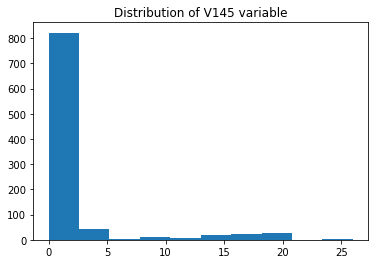

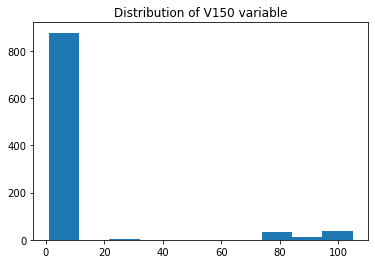

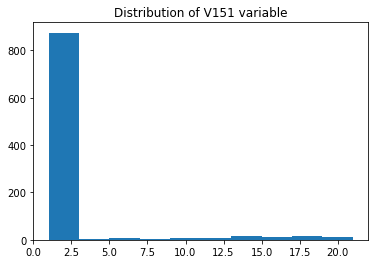

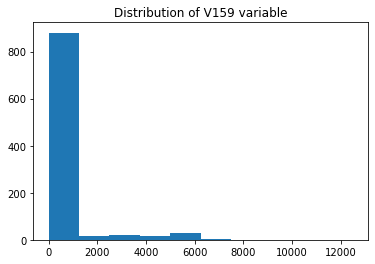

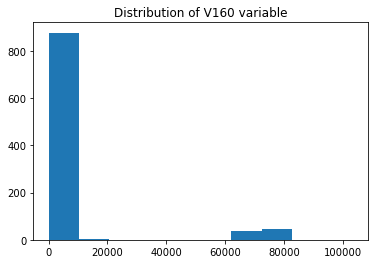

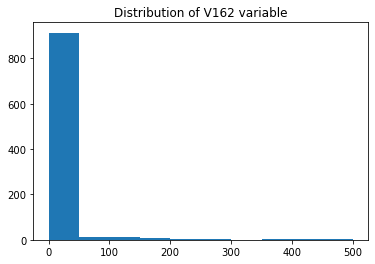

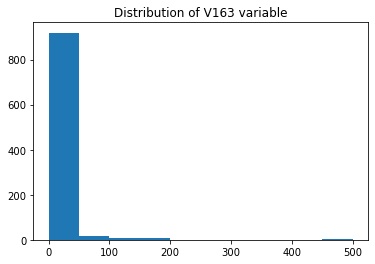

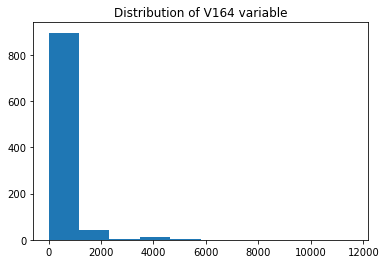

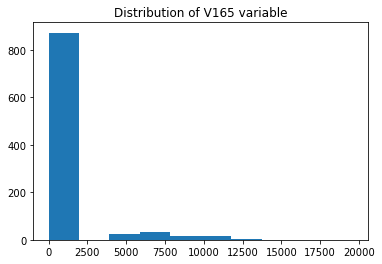

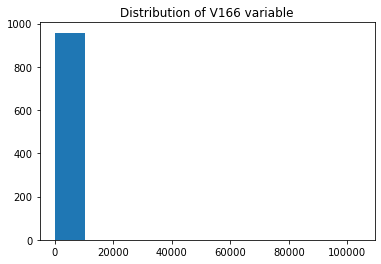

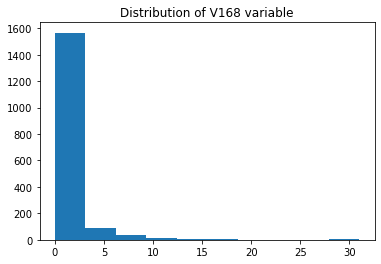

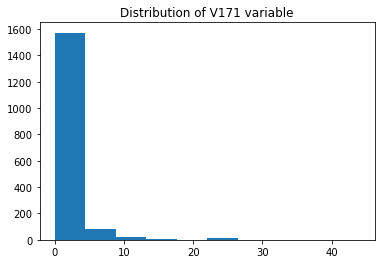

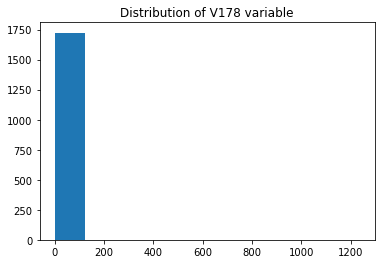

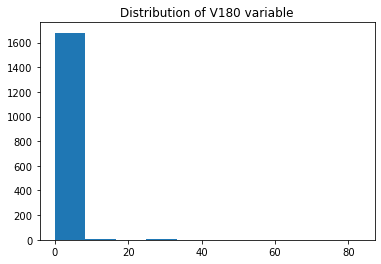

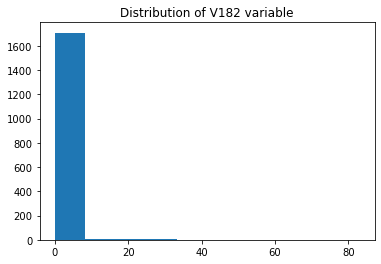

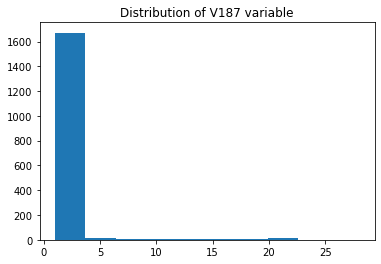

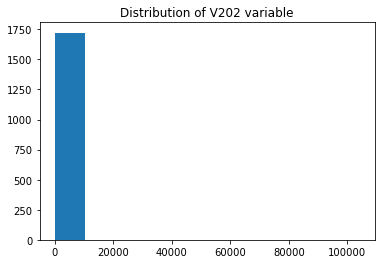

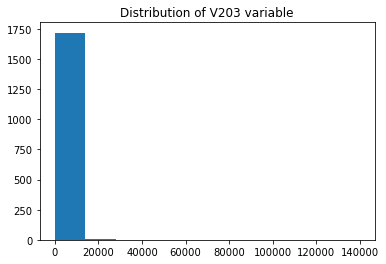

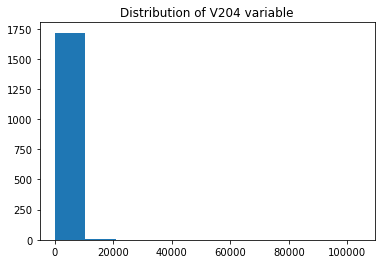

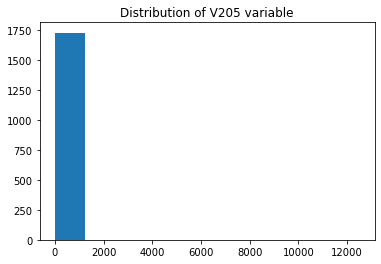

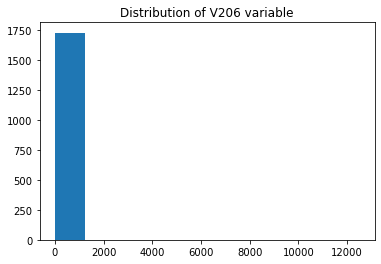

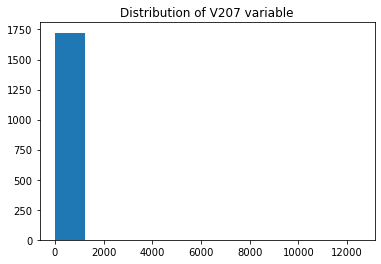

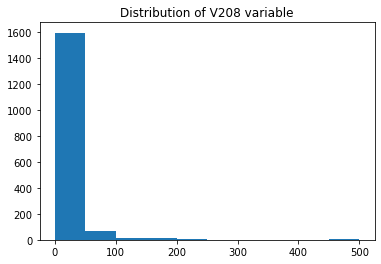

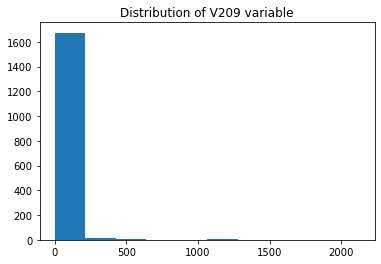

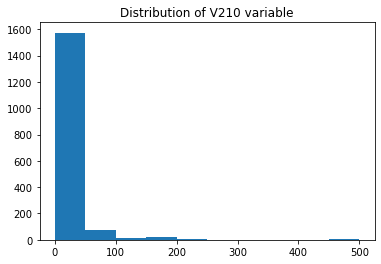

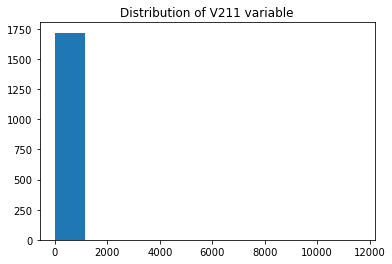

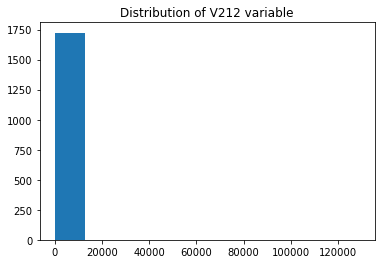

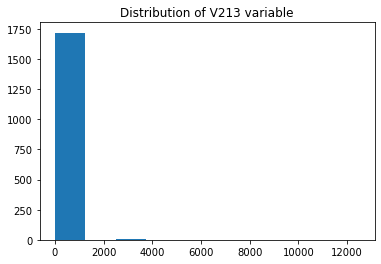

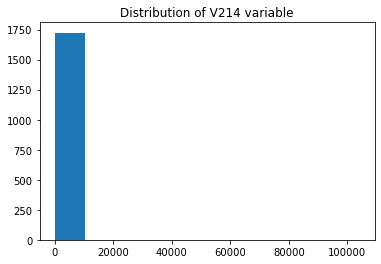

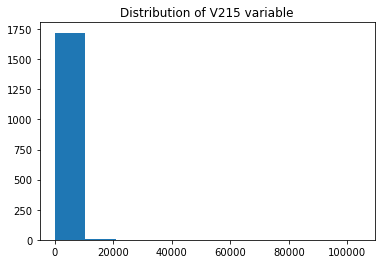

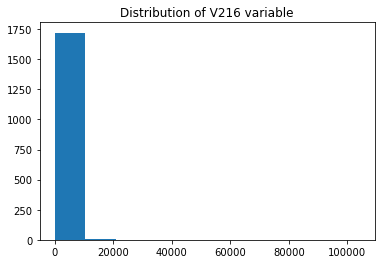

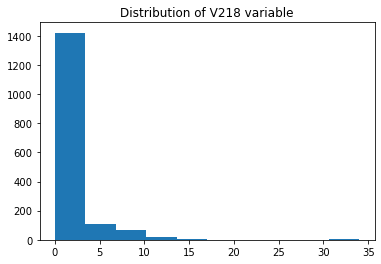

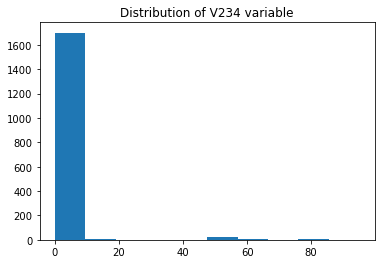

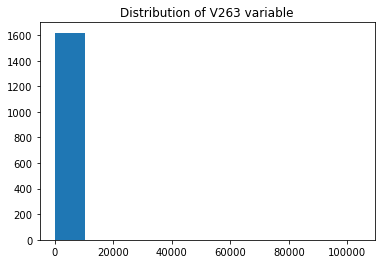

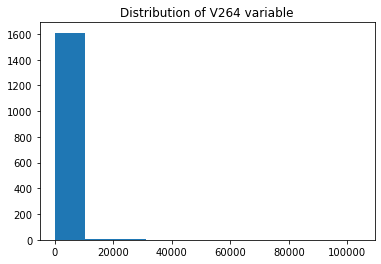

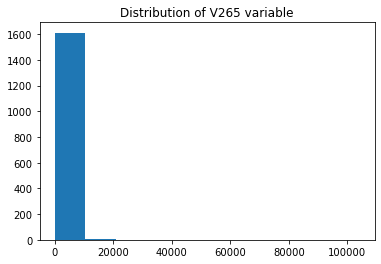

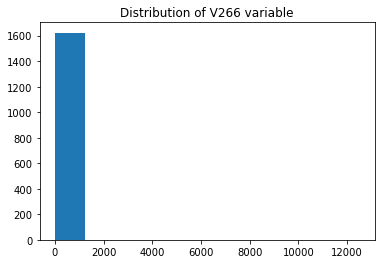

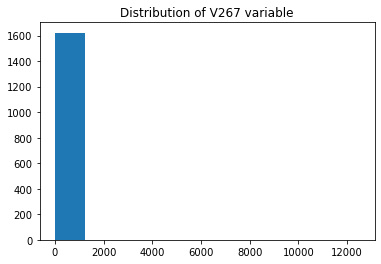

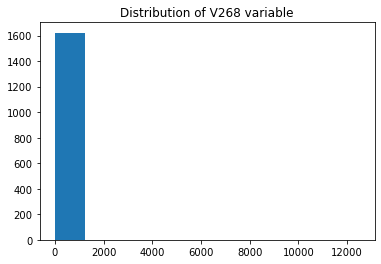

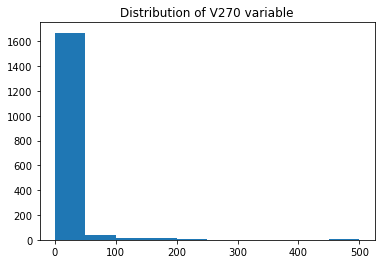

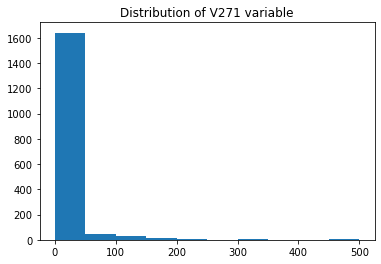

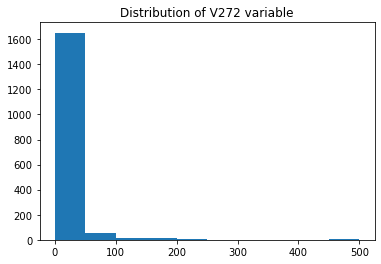

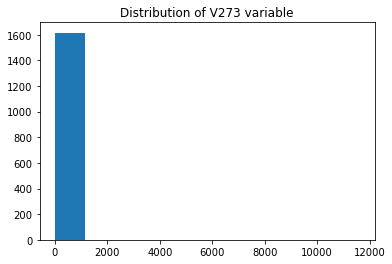

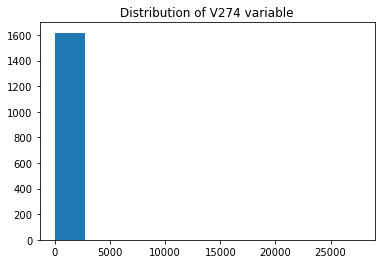

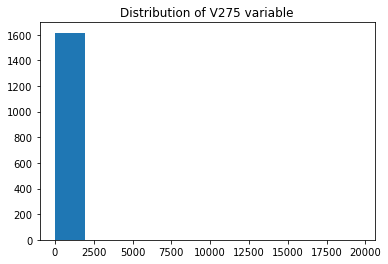

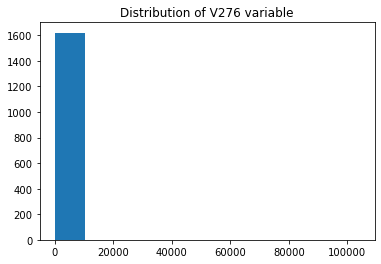

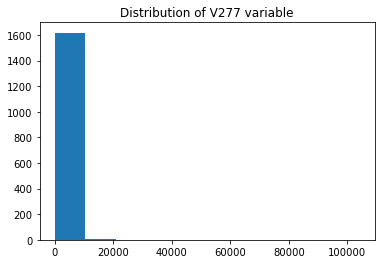

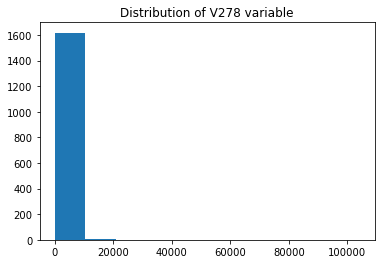

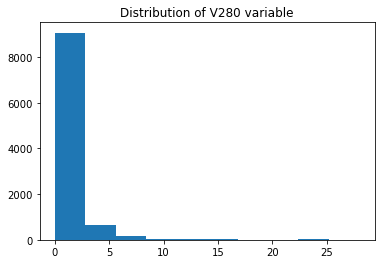

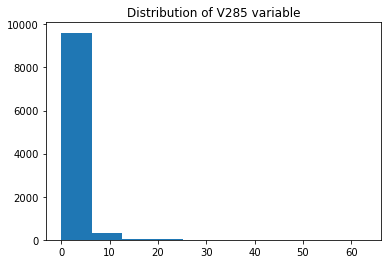

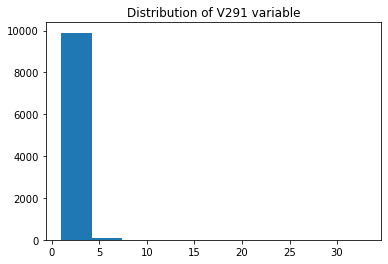

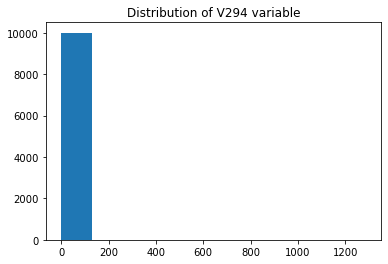

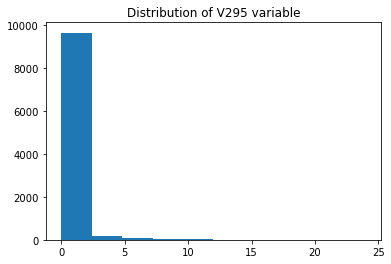

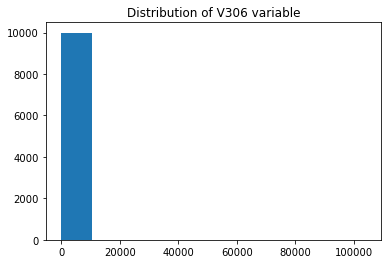

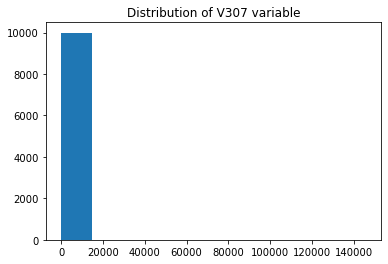

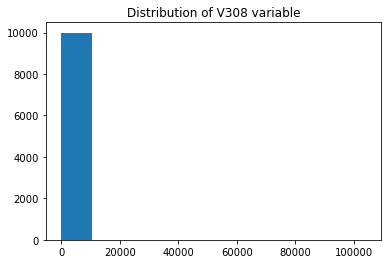

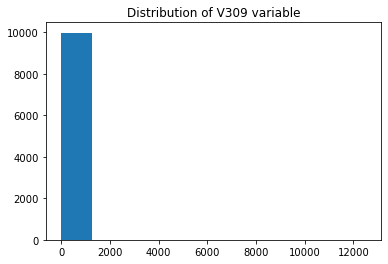

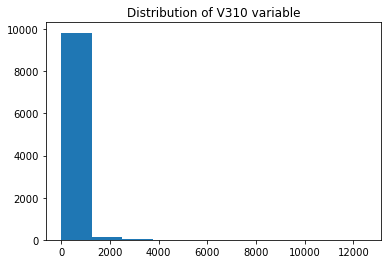

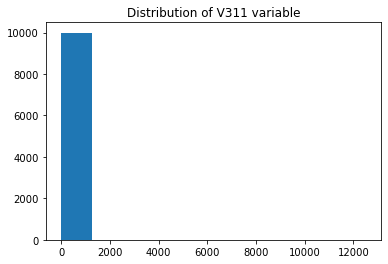

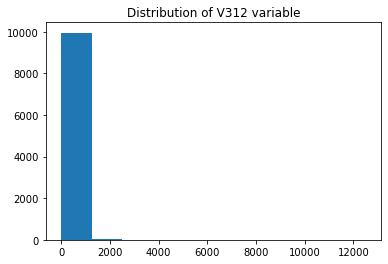

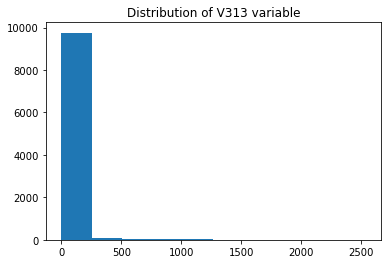

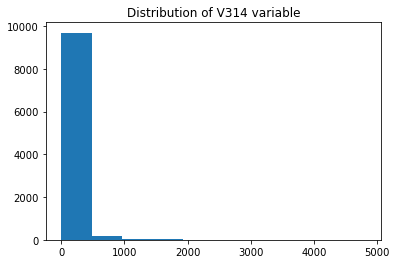

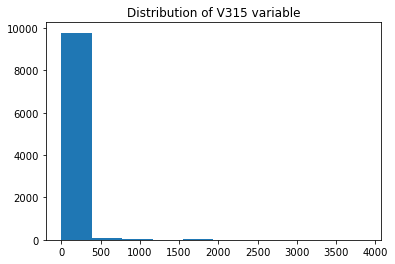

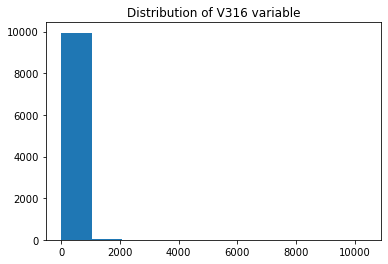

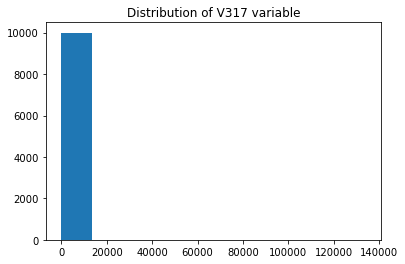

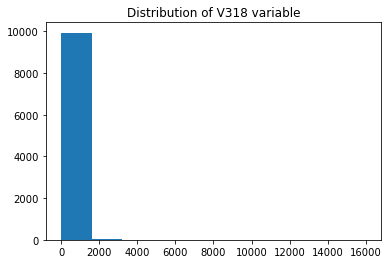

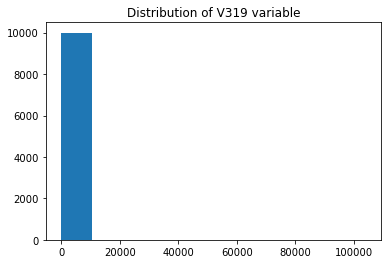

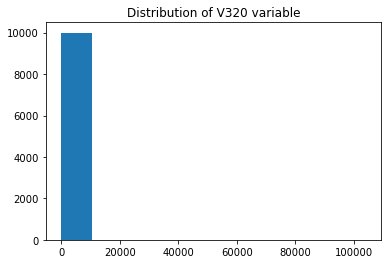

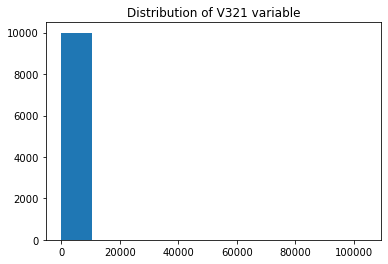

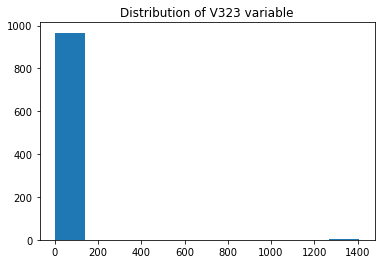

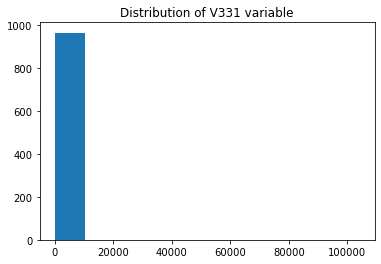

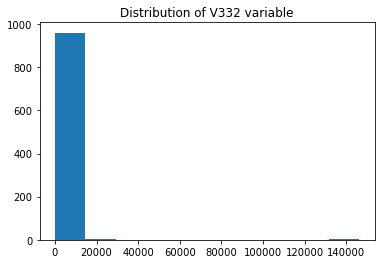

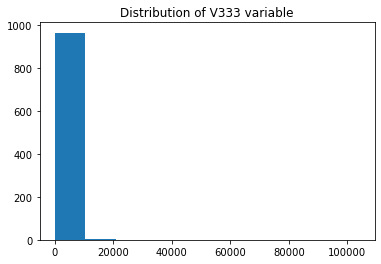

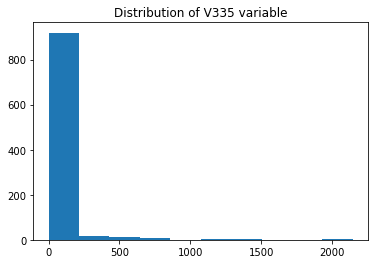

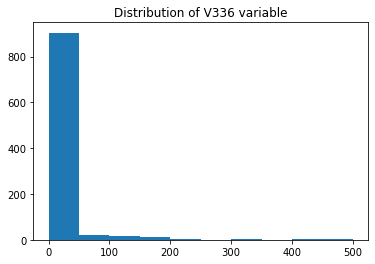

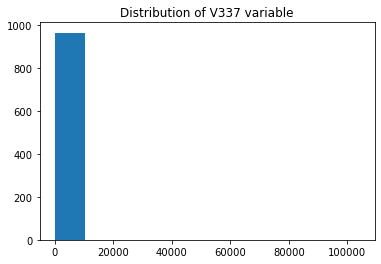

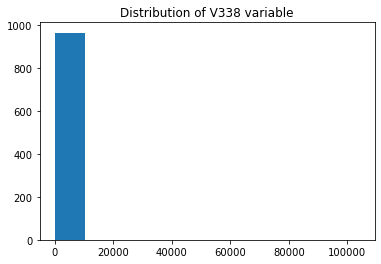

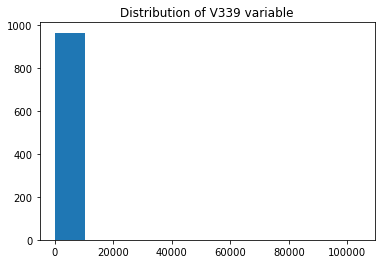

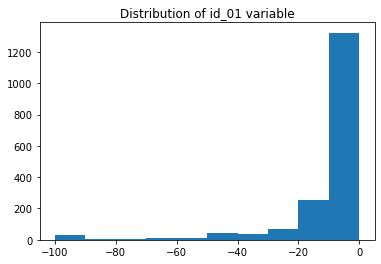

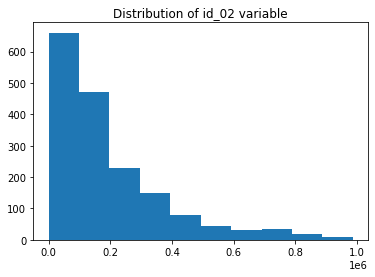

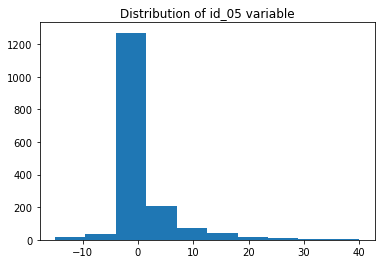

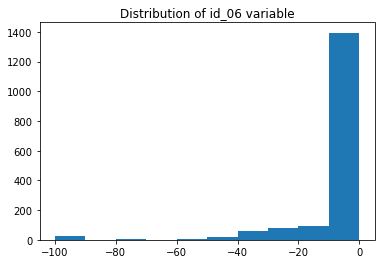

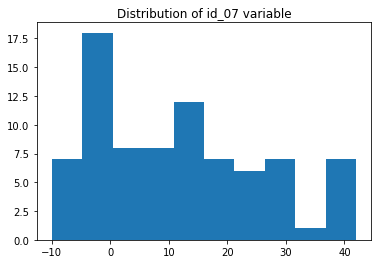

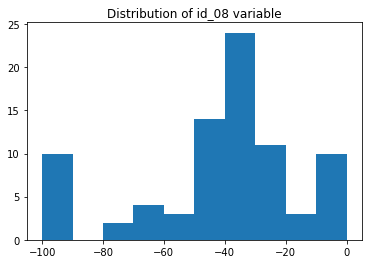

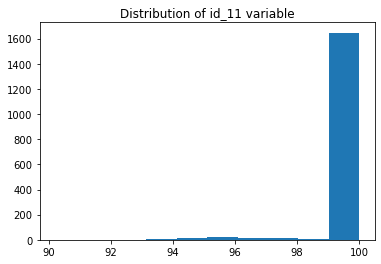

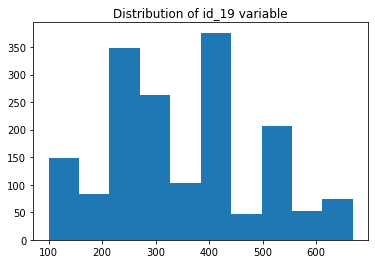

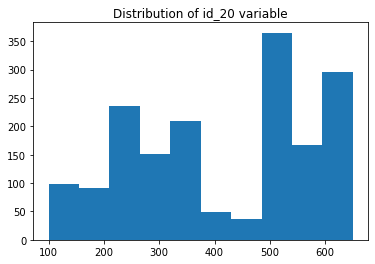

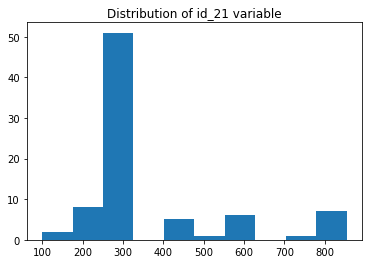

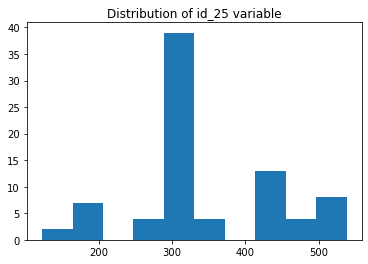

In [10]:
for feature in continuous_features:
    plt.hist(dataset[feature]);
    plt.title(f'Distribution of {feature} variable');
    plt.show()

## Categorical

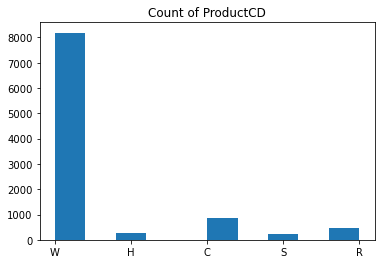

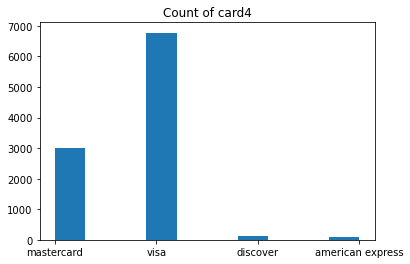

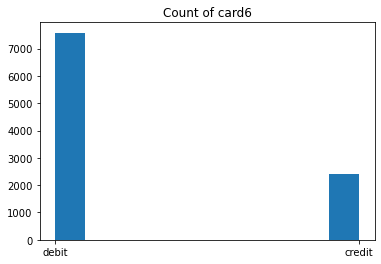

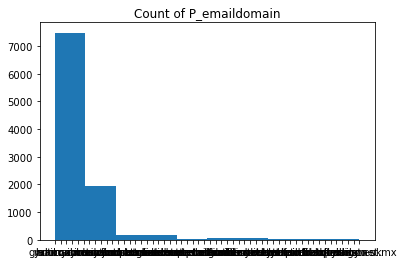

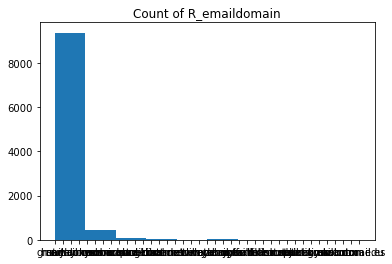

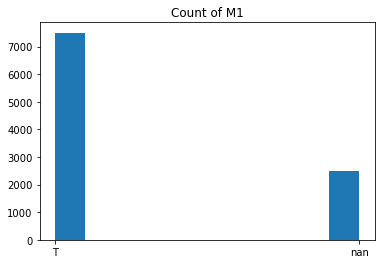

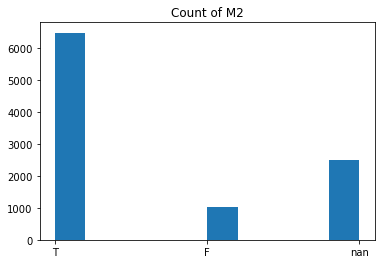

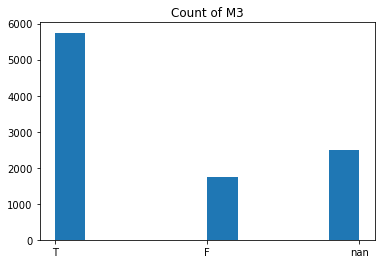

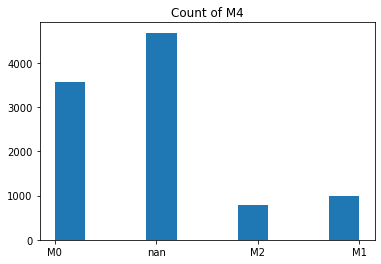

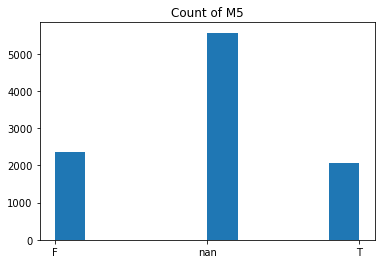

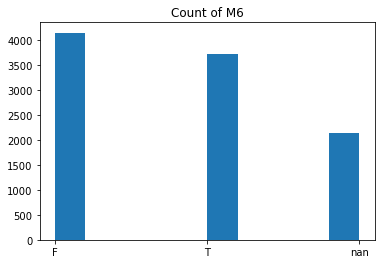

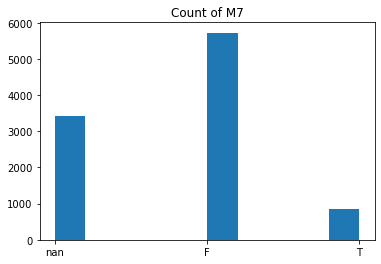

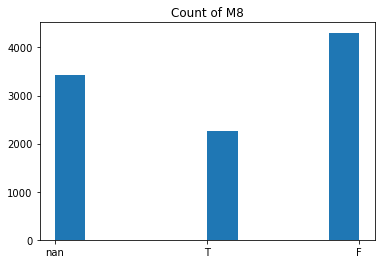

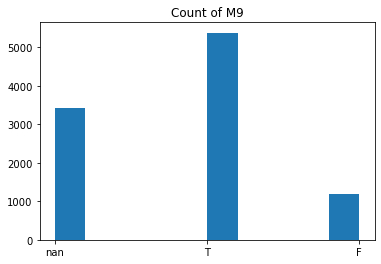

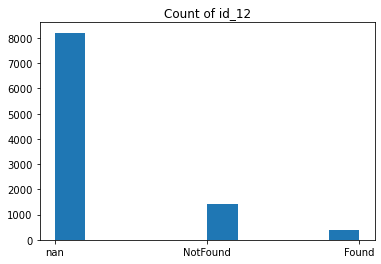

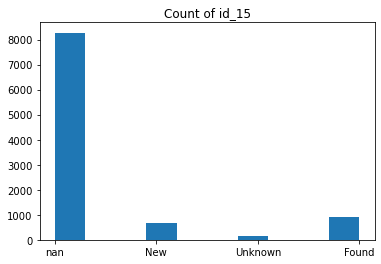

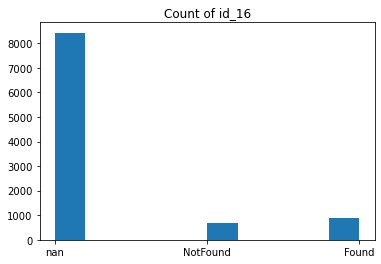

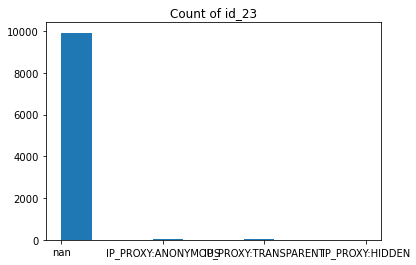

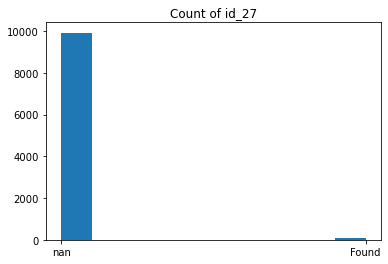

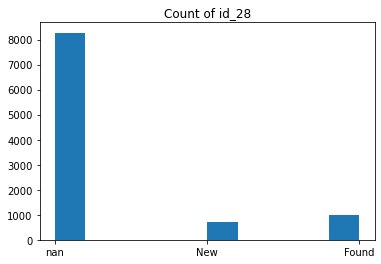

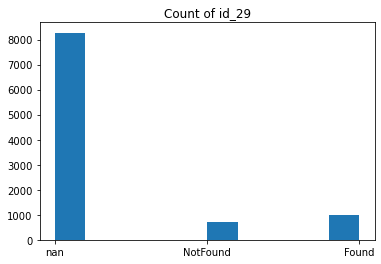

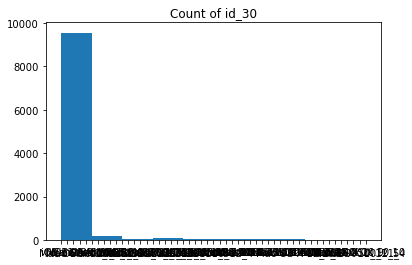

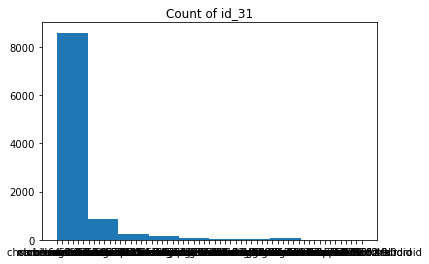

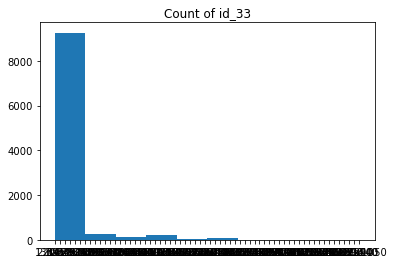

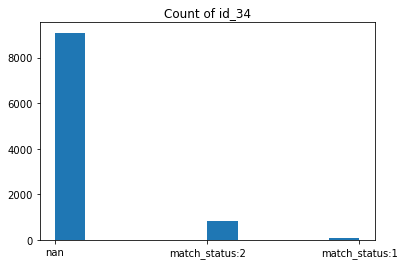

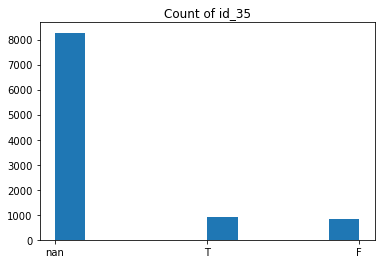

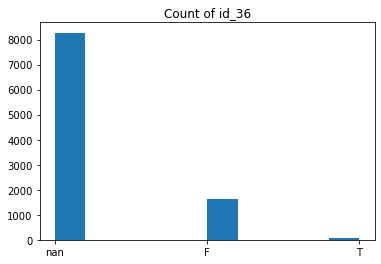

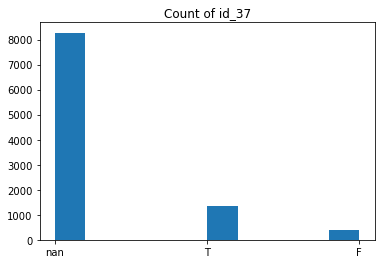

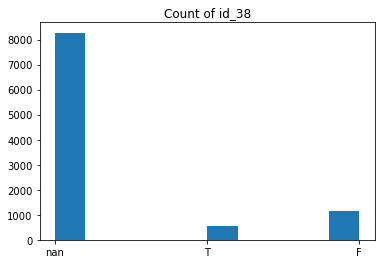

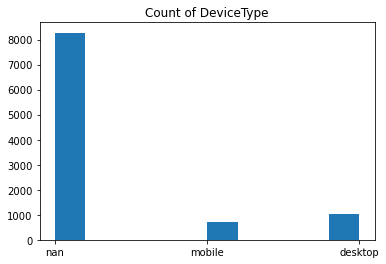

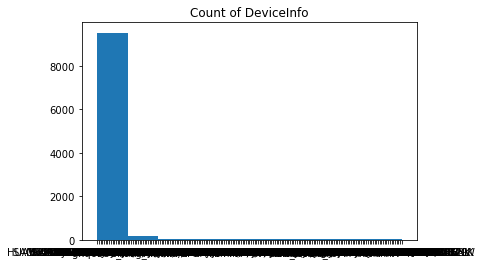

In [11]:
## Discrete train

for feature in categorical_features:
    plt.hist(dataset[feature]);
    plt.title(f"Count of {feature}")
    plt.show()

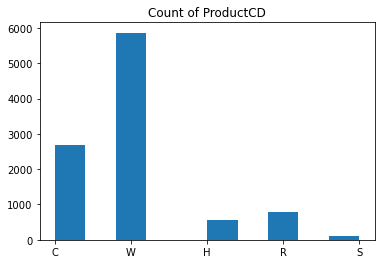

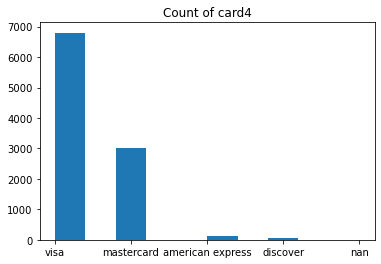

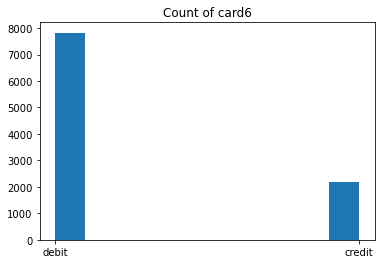

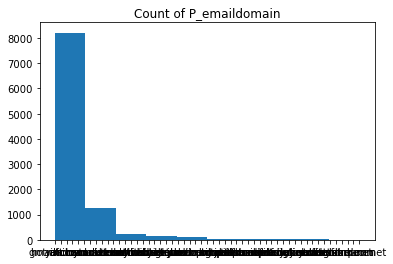

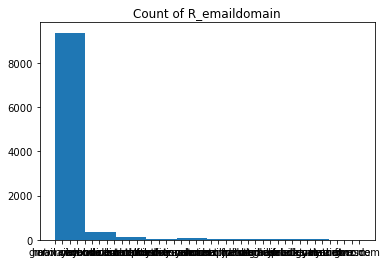

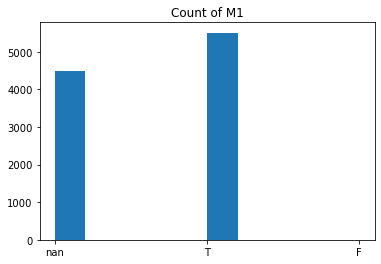

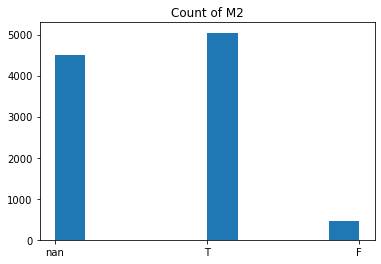

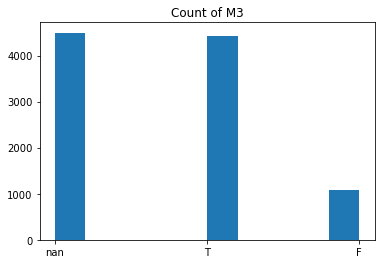

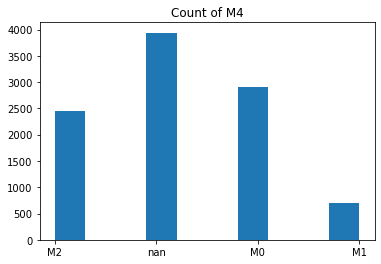

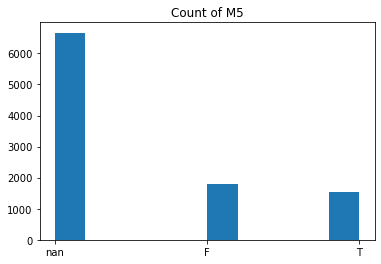

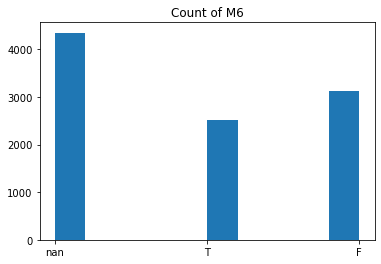

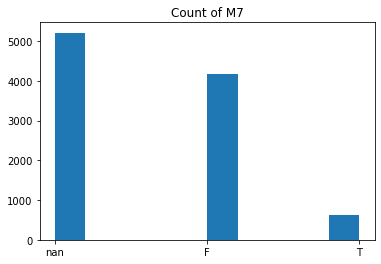

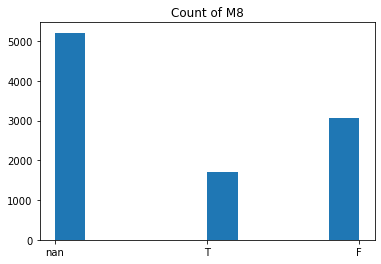

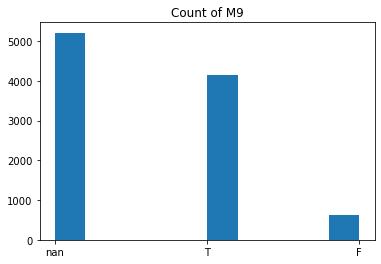

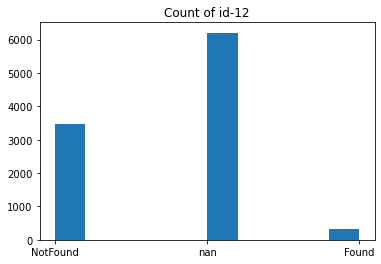

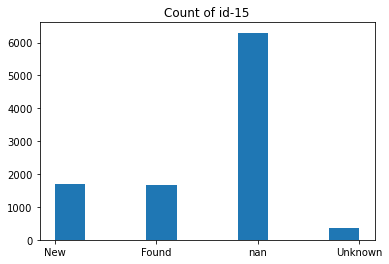

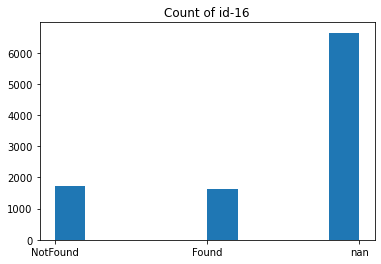

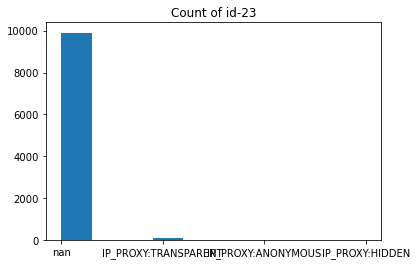

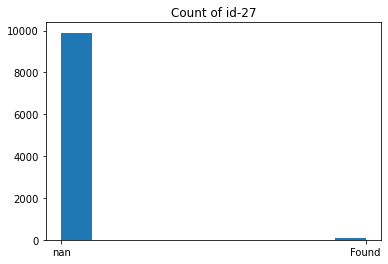

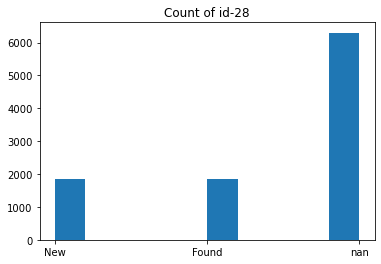

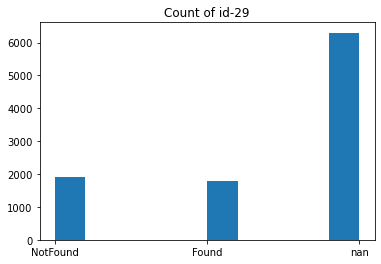

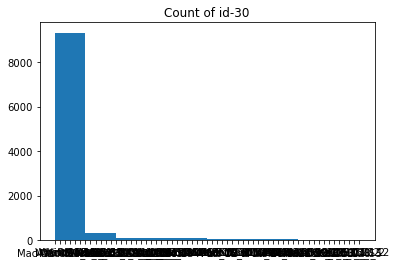

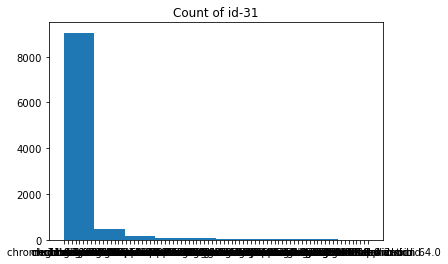

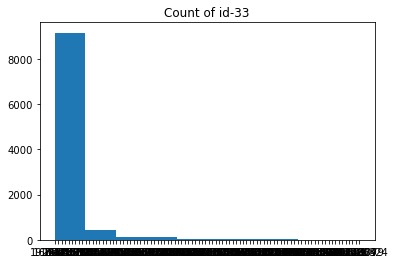

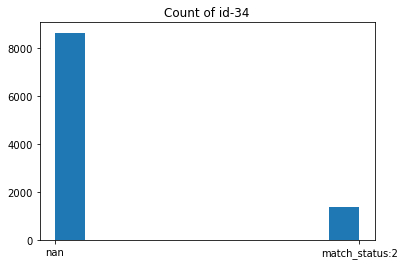

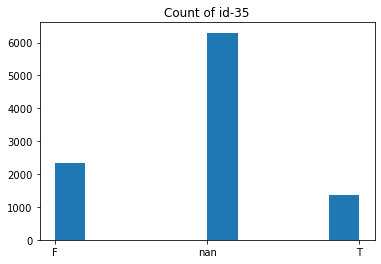

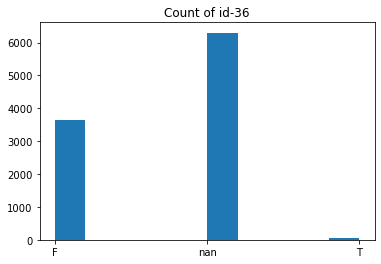

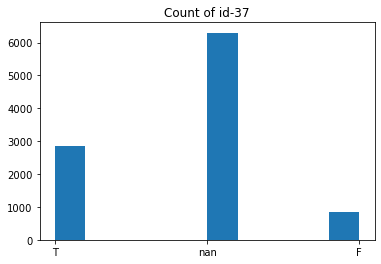

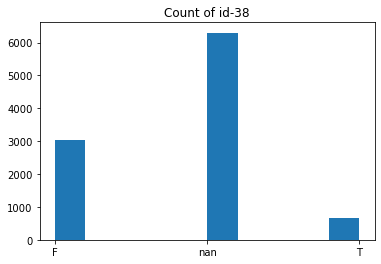

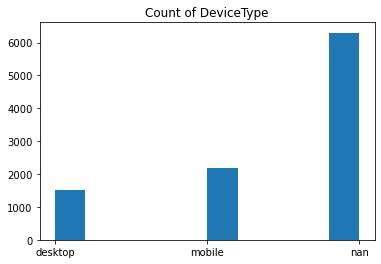

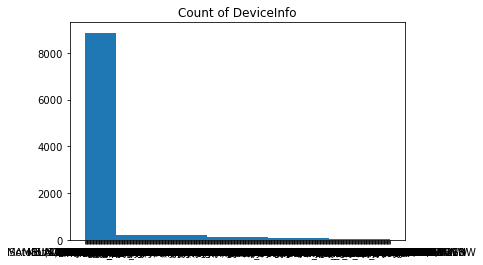

In [12]:
# Categorical test
for feature in categorical_features_test:
    plt.hist(test[feature]);
    plt.title(f"Count of {feature}")
    plt.show()

In [13]:
# Basically numerical showing of above ^
for feature in categorical_features:
    print(feature)
    print(dataset[feature].value_counts(dropna=False, normalize=True).head())
    print()

ProductCD
W    0.8186
C    0.0845
R    0.0447
H    0.0285
S    0.0237
Name: ProductCD, dtype: float64

card4
visa                0.6777
mastercard          0.3009
discover            0.0123
american express    0.0091
Name: card4, dtype: float64

card6
debit     0.7582
credit    0.2418
Name: card6, dtype: float64

P_emaildomain
gmail.com        0.3812
yahoo.com        0.1769
NaN              0.1614
anonymous.com    0.0690
hotmail.com      0.0650
Name: P_emaildomain, dtype: float64

R_emaildomain
NaN              0.8283
gmail.com        0.0716
hotmail.com      0.0336
anonymous.com    0.0294
yahoo.com        0.0148
Name: R_emaildomain, dtype: float64

M1
T      0.7501
NaN    0.2499
Name: M1, dtype: float64

M2
T      0.6487
NaN    0.2499
F      0.1014
Name: M2, dtype: float64

M3
T      0.5747
NaN    0.2499
F      0.1754
Name: M3, dtype: float64

M4
NaN    0.4681
M0     0.3560
M1     0.0983
M2     0.0776
Name: M4, dtype: float64

M5
NaN    0.5569
F      0.2359
T      0.2072
Name: M5, dtyp

#### Categorical Relationship with isFraud

In [14]:

for feature in categorical_features:
    # Change it to percentage out of respective groups isFraud
    train_ = (dataset[~dataset[feature].isnull()].groupby(['isFraud'])[feature] # grouping isFruaud by the Product CD
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(feature))


    sns.barplot(x=feature, y='percentage', hue="isFraud", data=train_)
    plt.show()

# Result: 
# ProiductCD: If its 'C', there is a 40% chance that theres fraud, and H, R, S have high fraud
# Rank these by numerical features, with 'C' as the highest number that has highest % of fraud

# card4: If its 'visa', there is a 70% chance that theres fraud
# put discover 
# discover => visa => mastercard  => amex

# card6: if its 'debit', > 50% chance
#credit has high fraud
# credit => debit

# M4: If its M2, 45% is fraud
# M2 => M0 => M1

# M5: F => T # M6: F => T # M7: T => F # M8: F => T # M9: F => T
# id_12: Not Found => Found # id_15: Found => Unknown => New # id_16: Found => Not # id_23: Anon => Hidden / Transparent 
# id_28: Found => New # id_29: Found => Not # id_34: 2 => 1 # id_35: F => T # id_36: F => T # id_37: T => F 
# id_38: F => T # DeviceType: mobile => desktop 

NameError: name 'sns' is not defined

## Numerical

### Continuous

In [ ]:
continuous_features

In [ ]:
# This is transaction data time
plt.hist(dataset['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');

# Result: Train and Test sets dont overlap. Test data time is greater than train. 
# Create two other dataframe columns called "Day" and "Hour". We will then group them 
# by isFraud and find WHEN fraudulent activity occurs most

In [ ]:
dataset['day'] = (dataset['TransactionDT']//(3600*24)-1)%7 # By the day
test['day'] = (test['TransactionDT']//(3600*24)-1)%7 # By the day

dataset['hour'] = (dataset['TransactionDT']//(3600))%24
test['hour'] = (test['TransactionDT']//(3600))%24

In [ ]:
train_hour = (dataset.groupby(['isFraud'])['hour']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('hour'))
# Barplot is used to count the instances of fraud for each hour
sns.barplot(x='hour',y='percentage', hue="isFraud", data=train_hour)
#Result: We see less activity from hour 4 to 8. So in the morning

In [ ]:
dataset.boxplot(column='TransactionAmt') # hella skewed

In [ ]:
# transaction amt that is logged
dataset['LogTransactionAmt'] = np.log(dataset['TransactionAmt'])
test['LogTransactionAmt'] = np.log(test['TransactionAmt'])


# Find distribution of transactionAmt, 
sns.distplot(dataset[dataset['isFraud']==0]['LogTransactionAmt'])
sns.distplot(dataset[dataset['isFraud']==1]['LogTransactionAmt'])
plt.legend(['legit','fraud'])
plt.title('Train')
plt.show()

dataset=dataset.drop(["LogTransactionAmt"], axis = 1)
test=test.drop(["LogTransactionAmt"], axis = 1)

# Result: WEe see that there is HUGE fraud frequency in the Amt=6 - 7 and Amt = 1 - 2
# Most likely a legit if transactAmt is btwn 3 - 5

## Card 1

In [ ]:
for feature in 
sns.distplot(dataset[dataset['isFraud']==0]['card1'])
# sns.distplot(dataset[dataset['isFraud']==1]['card1'])
plt.legend(['legit','fraud'])
plt.title('Train')
plt.show()

# Result: When card1 = 5000, 

## Outliers

In [ ]:
# Find outliers in these continuous variables
for feature in continuous_features:
    data = dataset.copy()
    # If a feature set has 0 values, we dont want to do log(0) bc its undefined
    if 0 in data[feature].unique():
        pass
    else:
        print("Mean: ", data[feature].mean())
        print("Median: ", data[feature].median())
        data[feature] = np.log(data[feature])
        dataset[feature] = np.log(dataset[feature])
        #Find outliers: do boxplot
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.show()

#Result: Make sure to log any that are skewed
# Need skewing: 

In [ ]:
for feature in continuous_features:
    sns.histplot(dataset[(dataset['isFraud']==0) & (~dataset[feature].isnull())][feature])
    sns.histplot(dataset[(dataset['isFraud']==1) & (~dataset[feature].isnull())][feature])
    plt.legend(['legit','fraud'])
    plt.title('Train')
    plt.show()

In [ ]:
dataset.head()

In [ ]:
print(len(dataset.columns))
print(len(test.columns))
print([feature for feature in dataset.columns if feature not in test.columns])
print()
print([feature for feature in test.columns if feature not in dataset.columns])


In [ ]:
dataset.to_csv('train_eda', index=False)
test.to_csv('test_eda', index=False)